In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Convert date column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

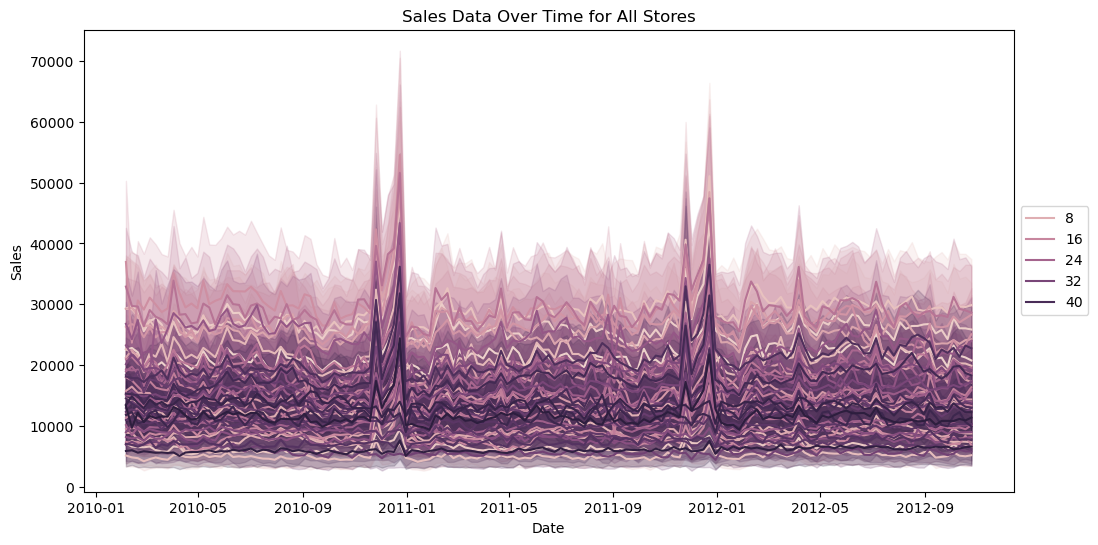

In [17]:
# Plot sales data over time for all stores
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=df_train)
plt.title('Sales Data Over Time for All Stores')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


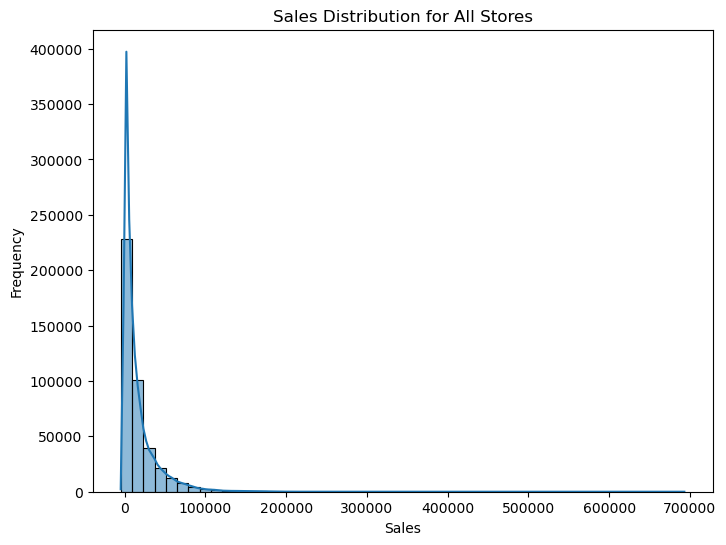

In [18]:
# Plot sales distribution for all stores
plt.figure(figsize=(8,6))
sns.histplot(df_train['Weekly_Sales'], bins=50, kde=True)
plt.title('Sales Distribution for All Stores')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

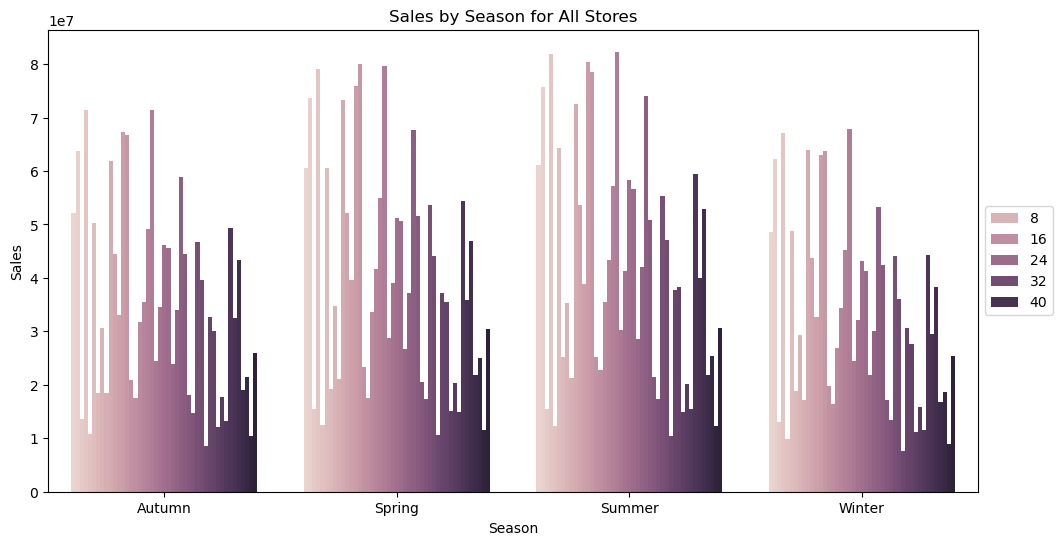

In [19]:
# Plot sales by season for all stores
df_train['Season'] = np.where(df_train['Date'].dt.month.isin([12, 1, 2]), 'Winter', np.where(df_train['Date'].dt.month.isin([3, 4, 5]), 'Spring', np.where(df_train['Date'].dt.month.isin([6, 7, 8]), 'Summer', 'Autumn')))
seasonal_sales = df_train.groupby(['Store', 'Season'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Season', y='Weekly_Sales', hue='Store', data=seasonal_sales)
plt.title('Sales by Season for All Stores')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

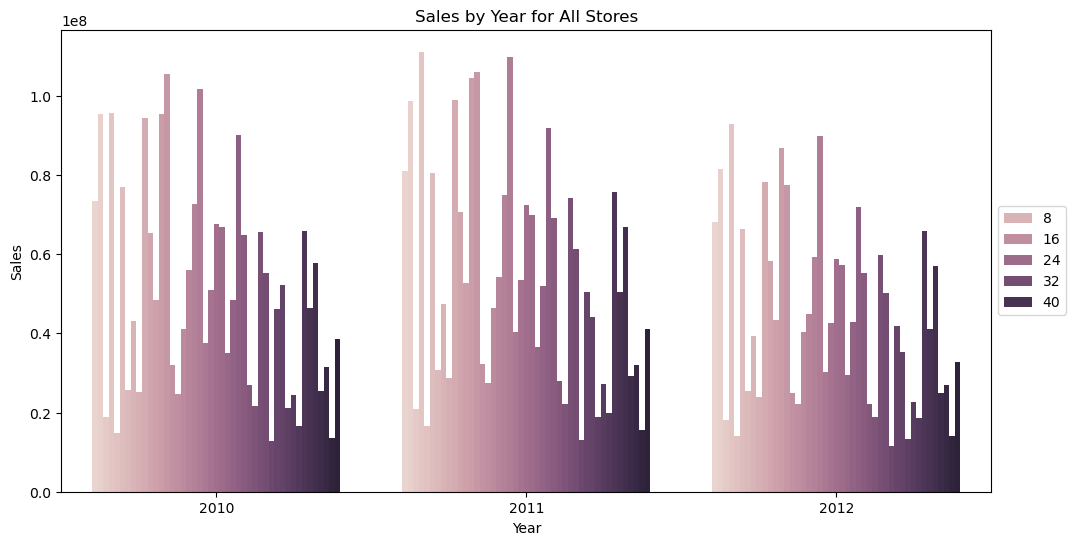

In [20]:
# Plot sales by year for all stores
df_train['Year'] = df_train['Date'].dt.year
yearly_sales = df_train.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Weekly_Sales', hue='Store', data=yearly_sales)
plt.title('Sales by Year for All Stores')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


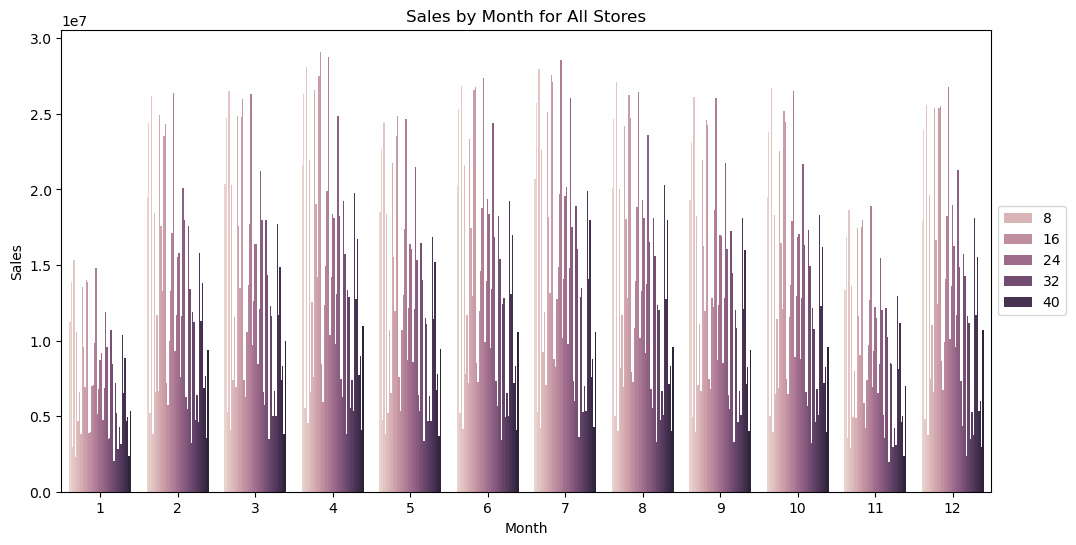

In [21]:
# Plot sales by month for all stores
df_train['Month'] = df_train['Date'].dt.month
monthly_sales = df_train.groupby(['Store', 'Month'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Weekly_Sales', hue='Store', data=monthly_sales)
plt.title('Sales by Month for All Stores')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

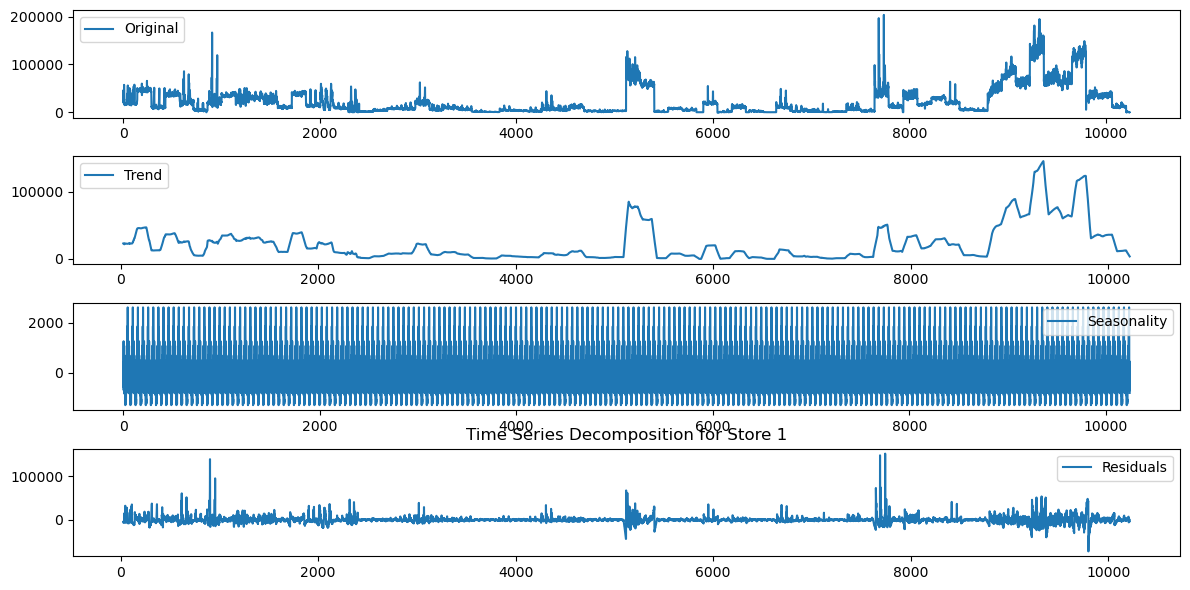

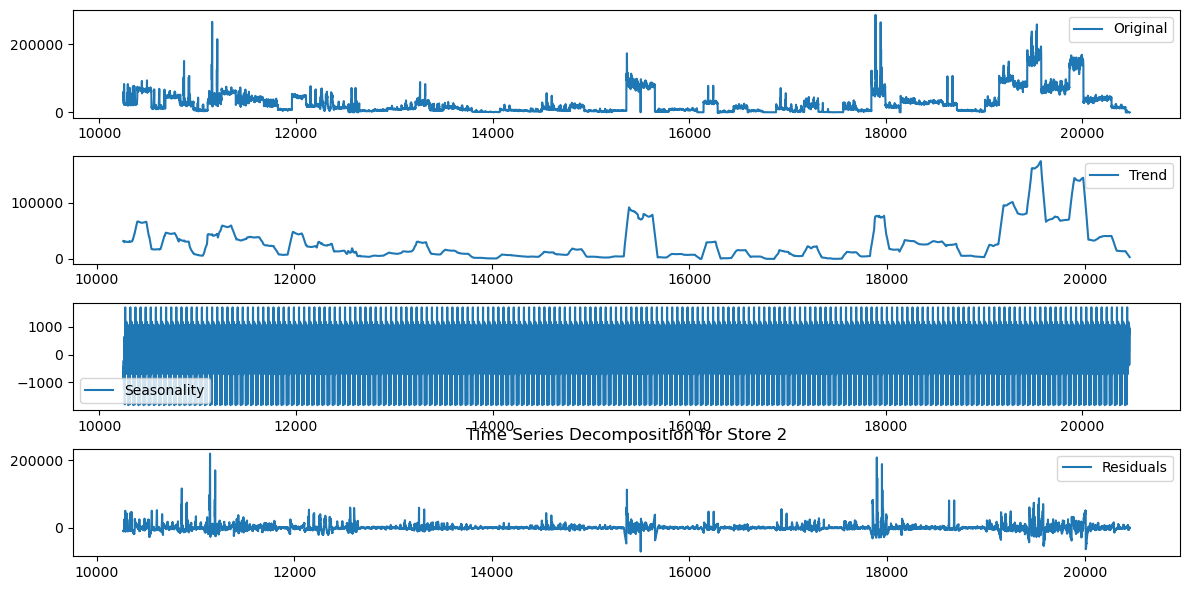

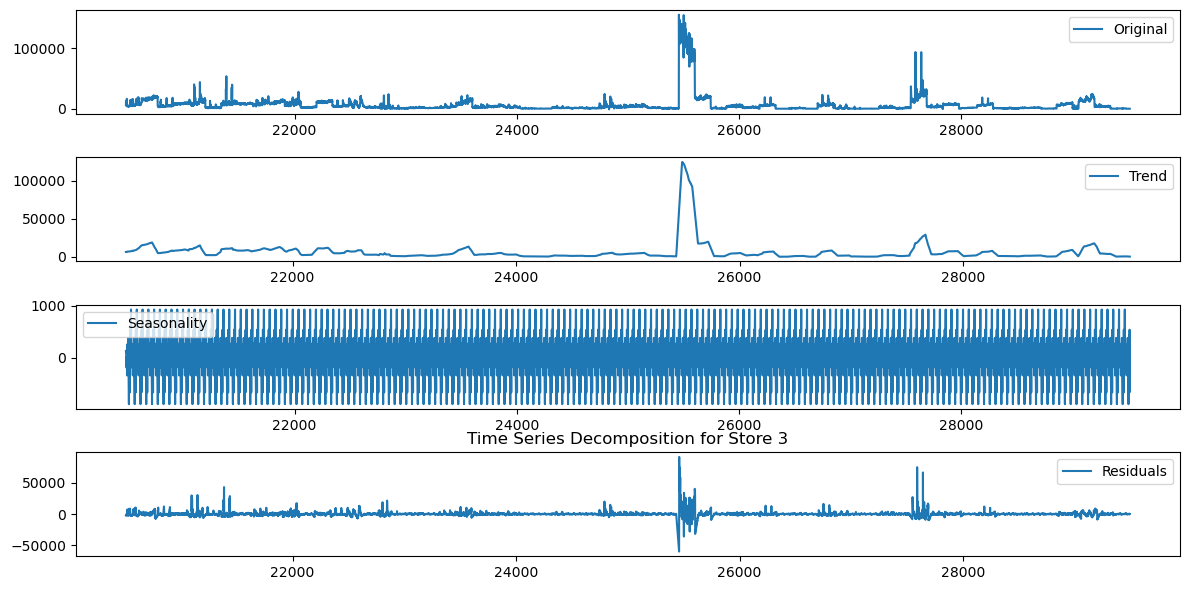

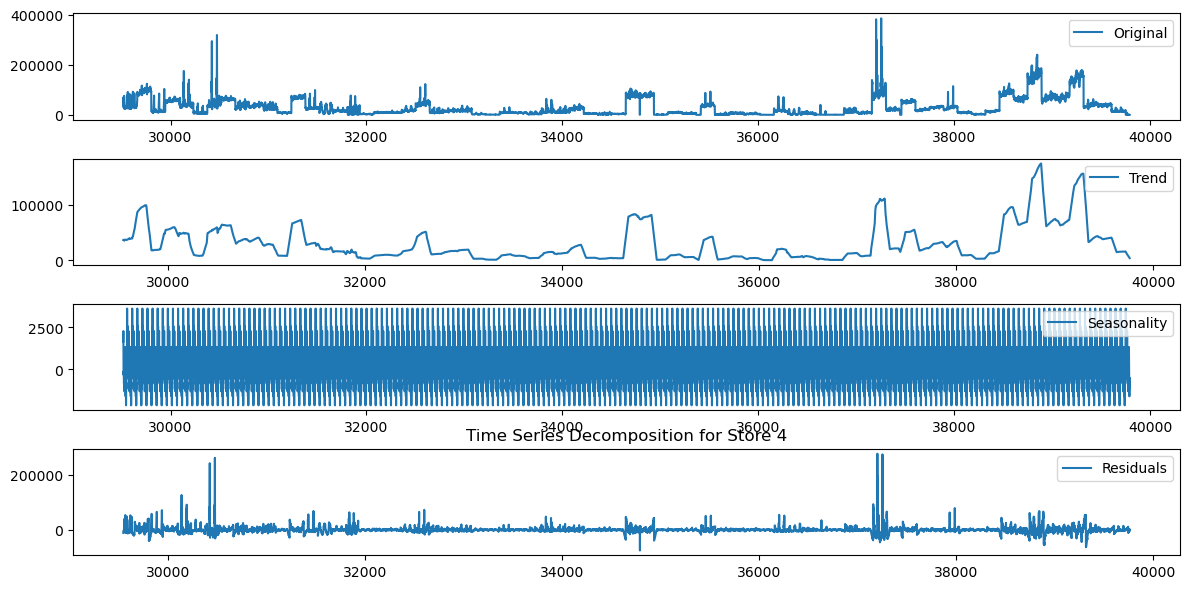

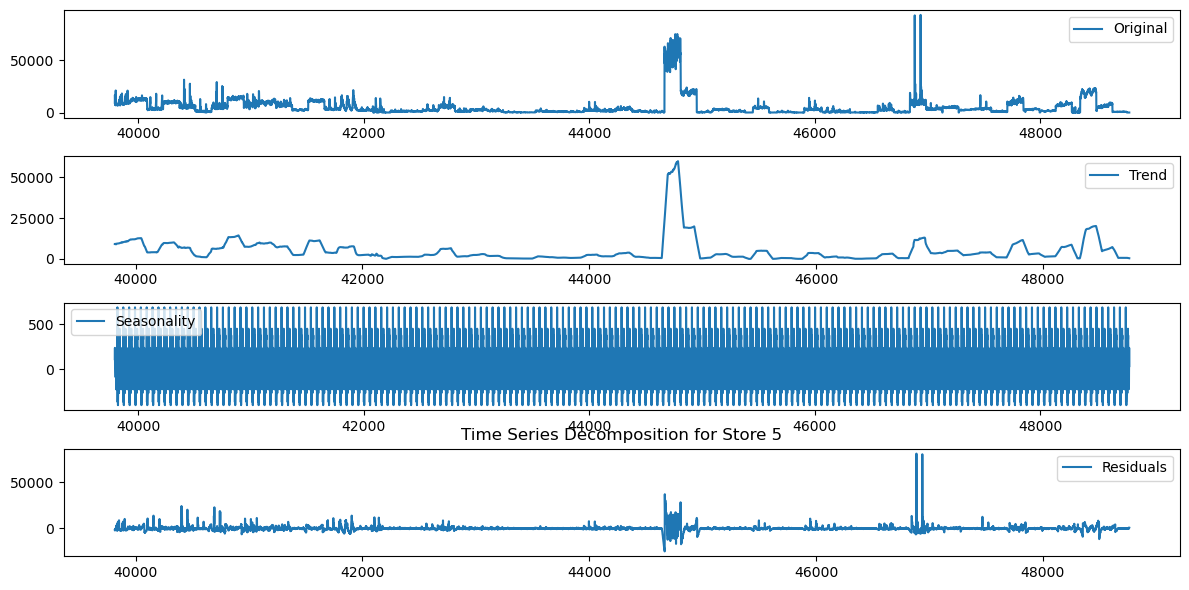

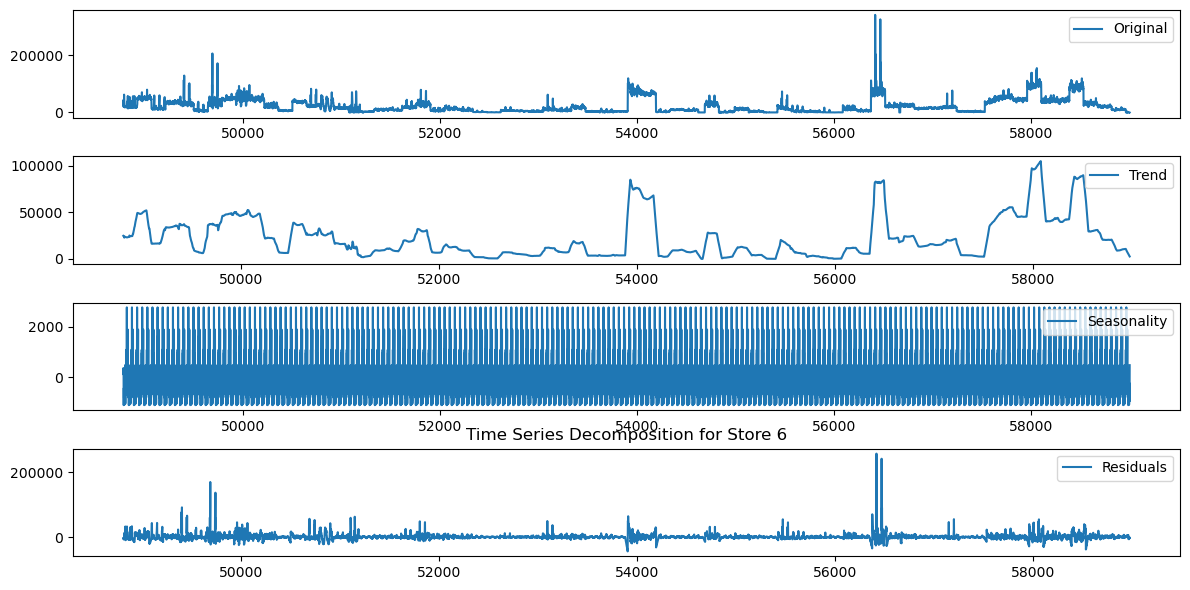

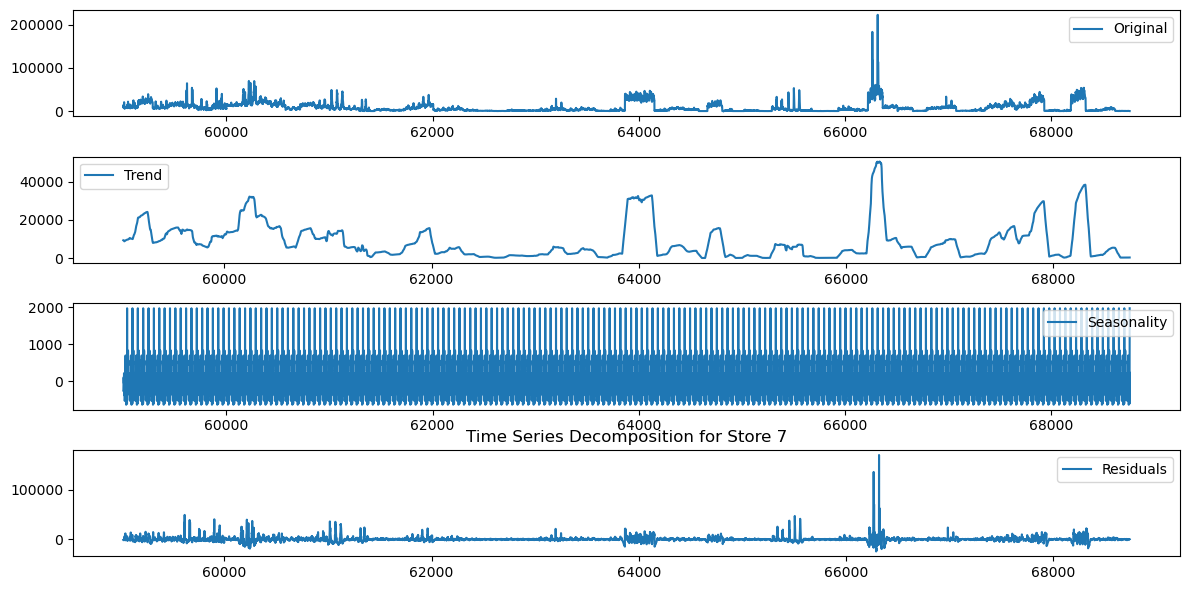

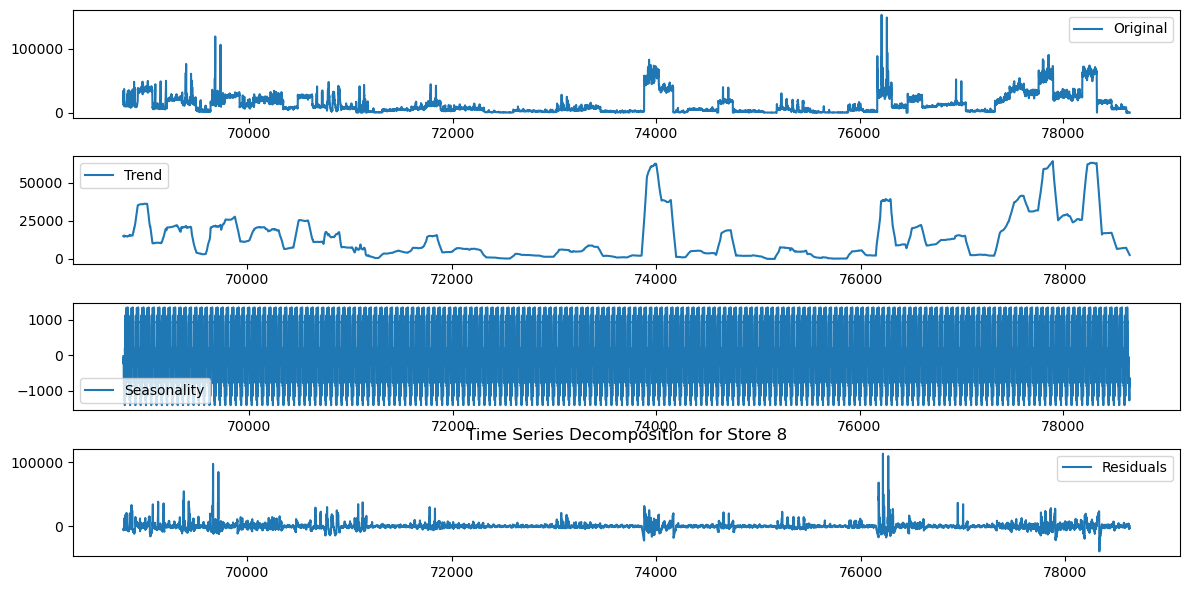

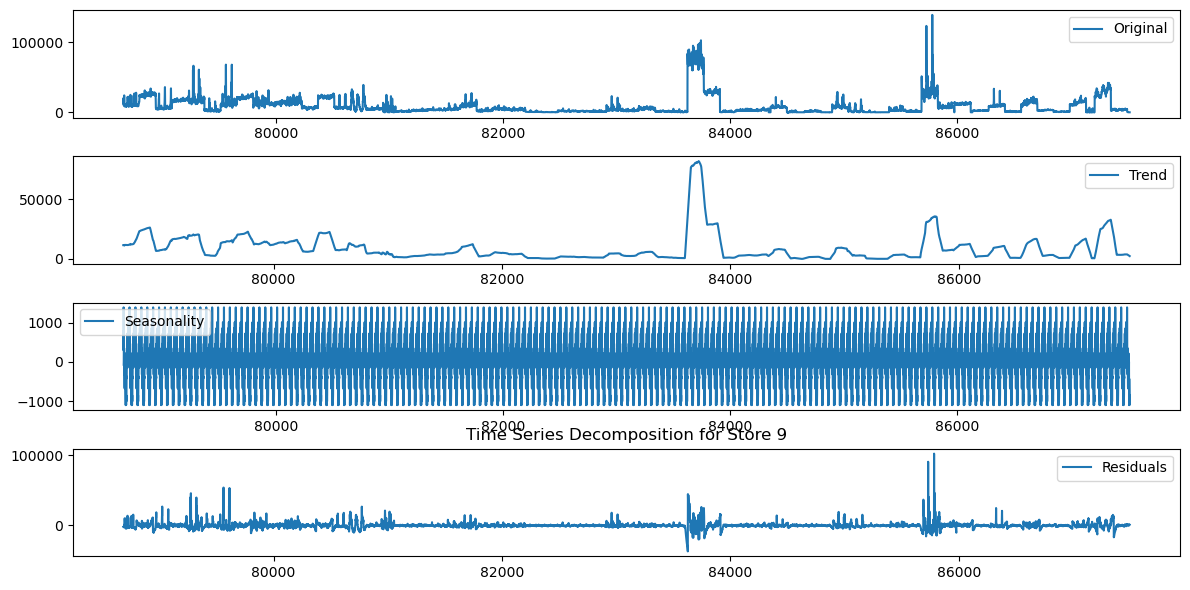

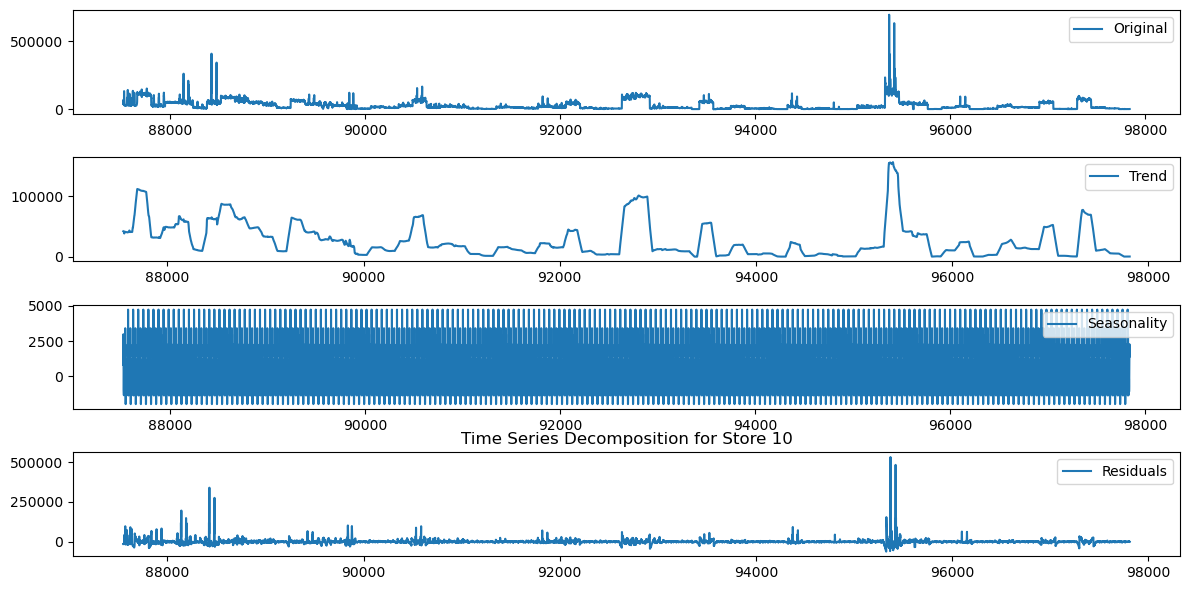

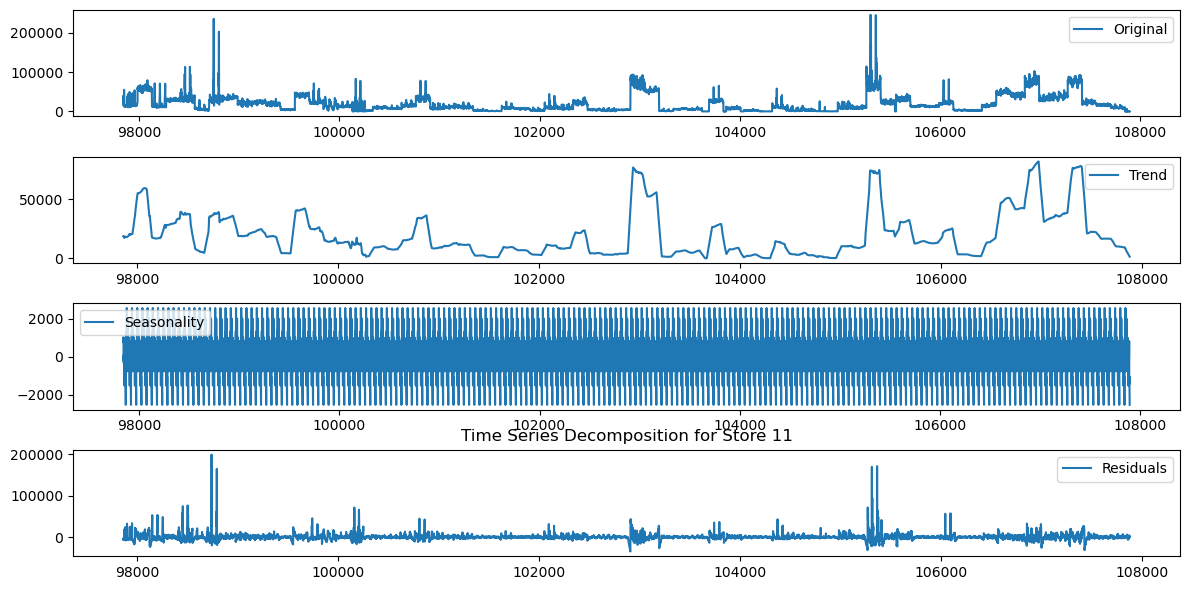

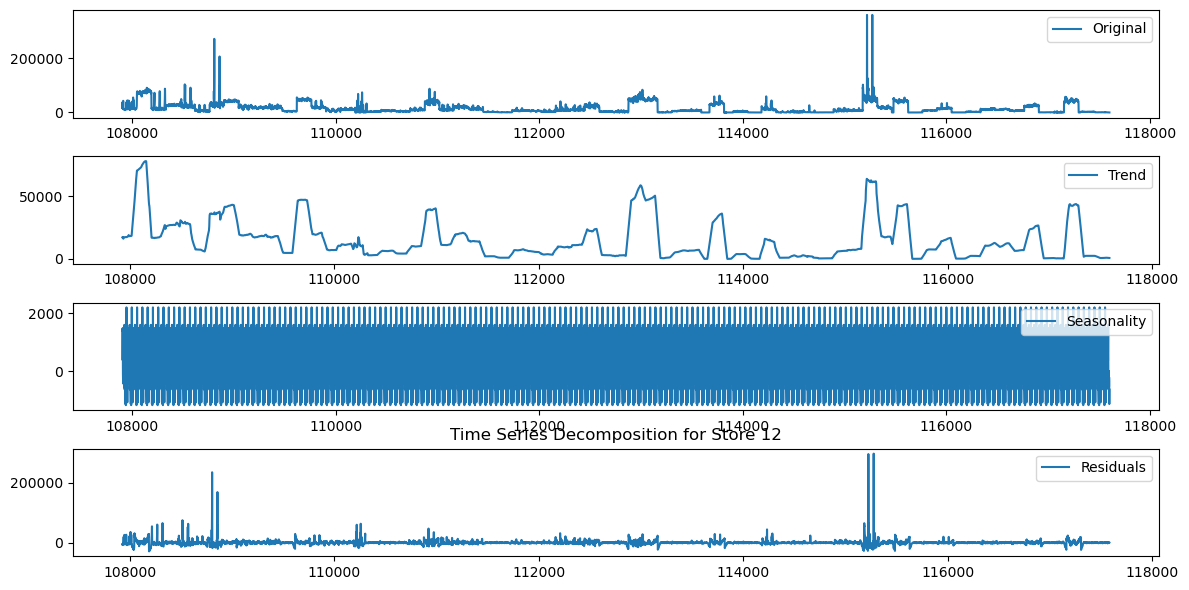

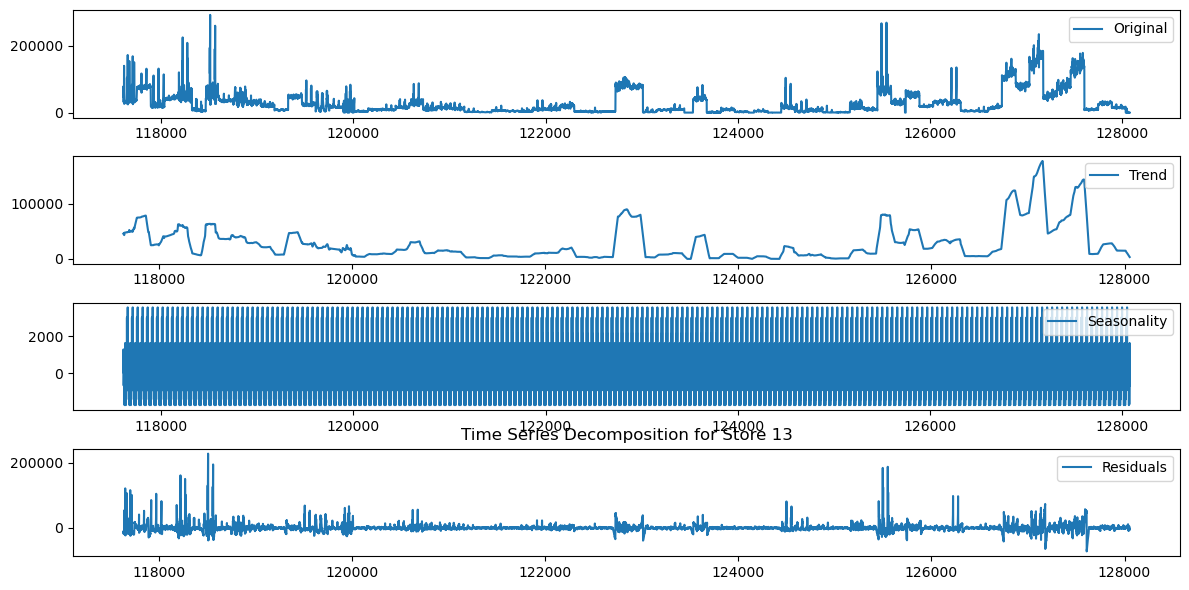

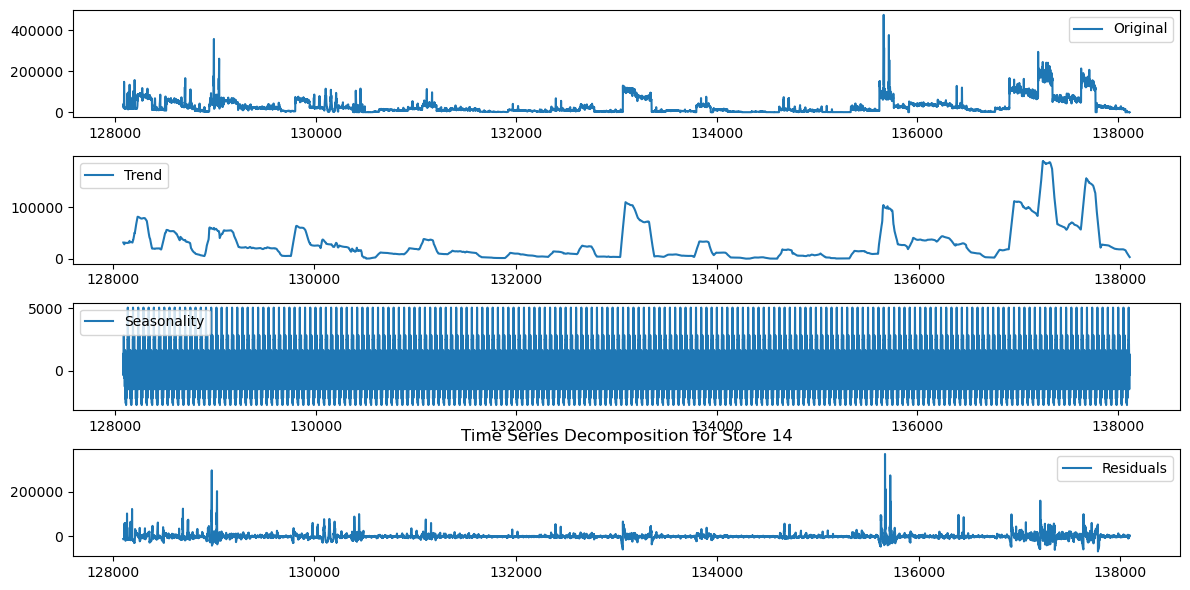

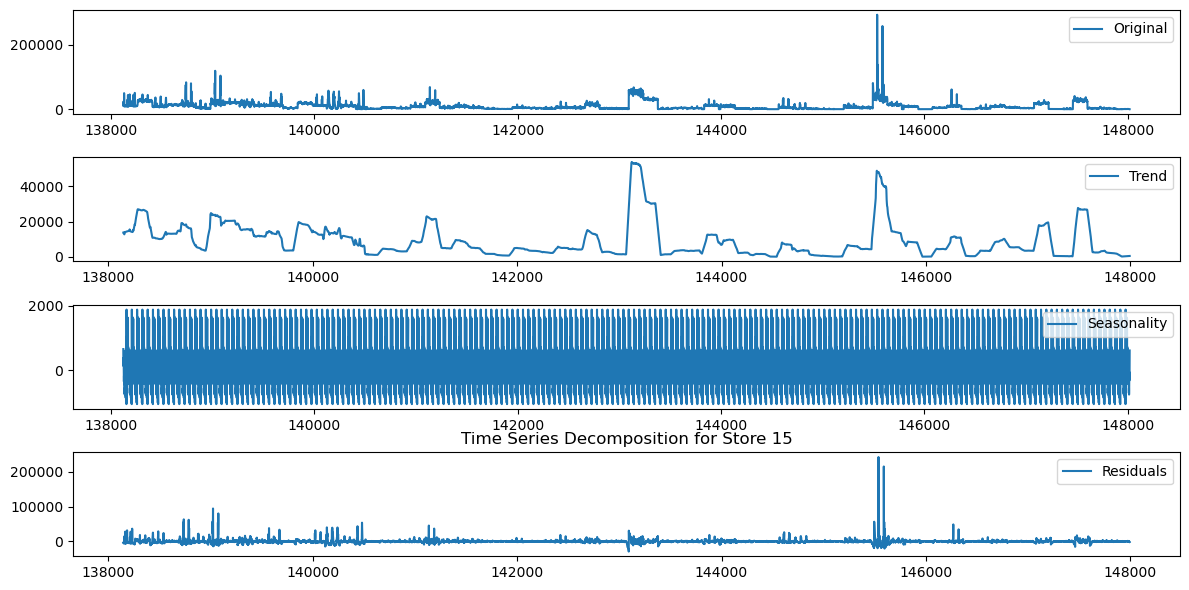

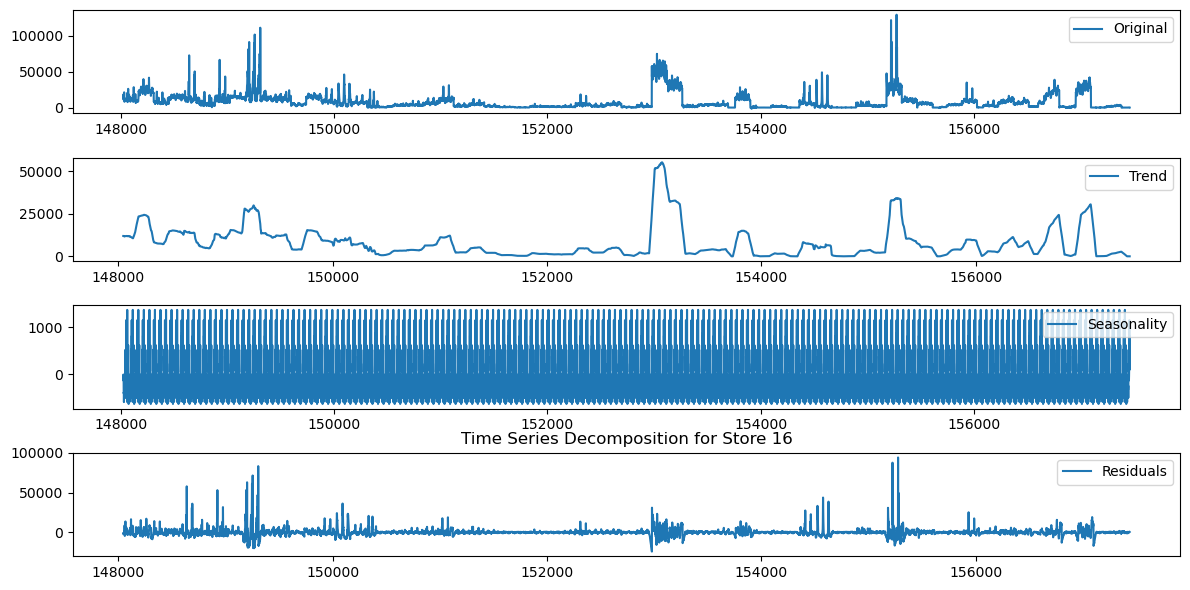

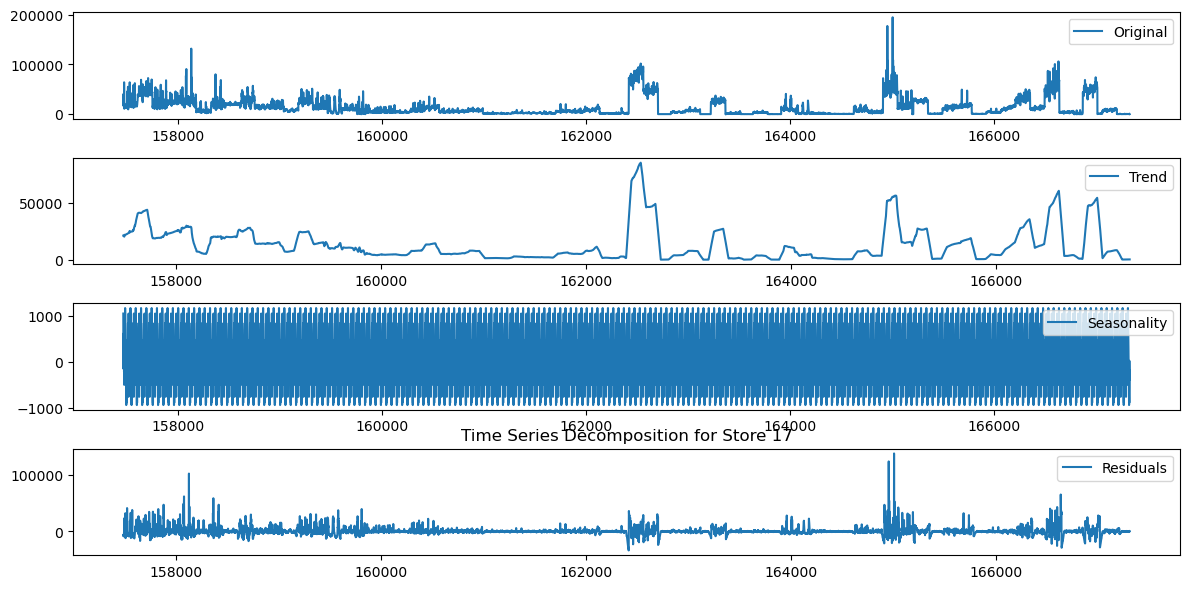

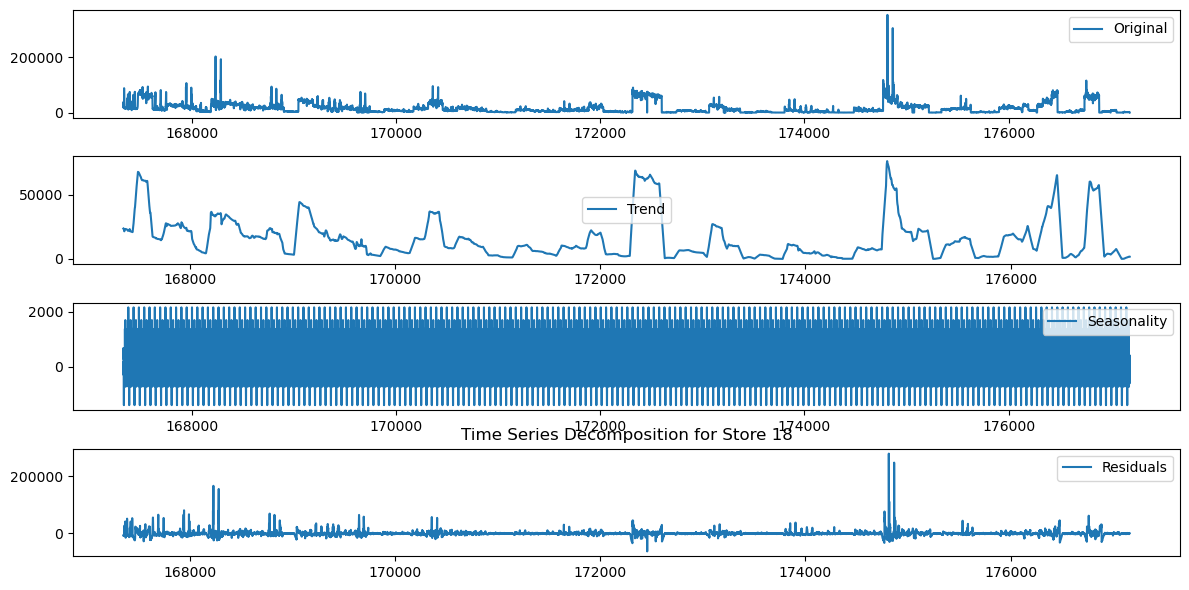

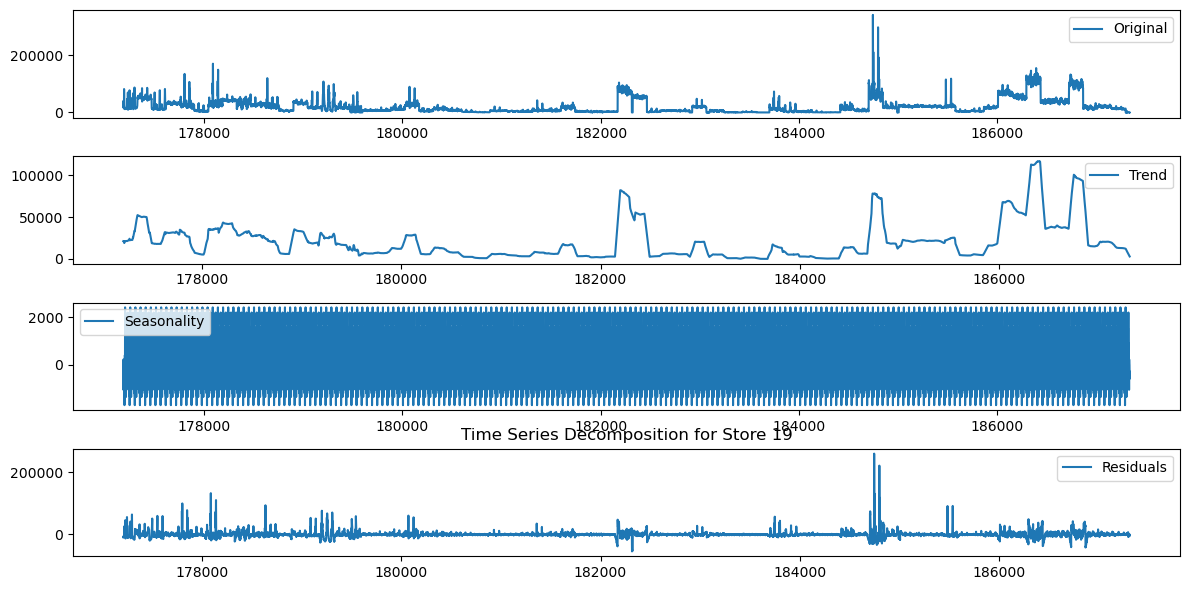

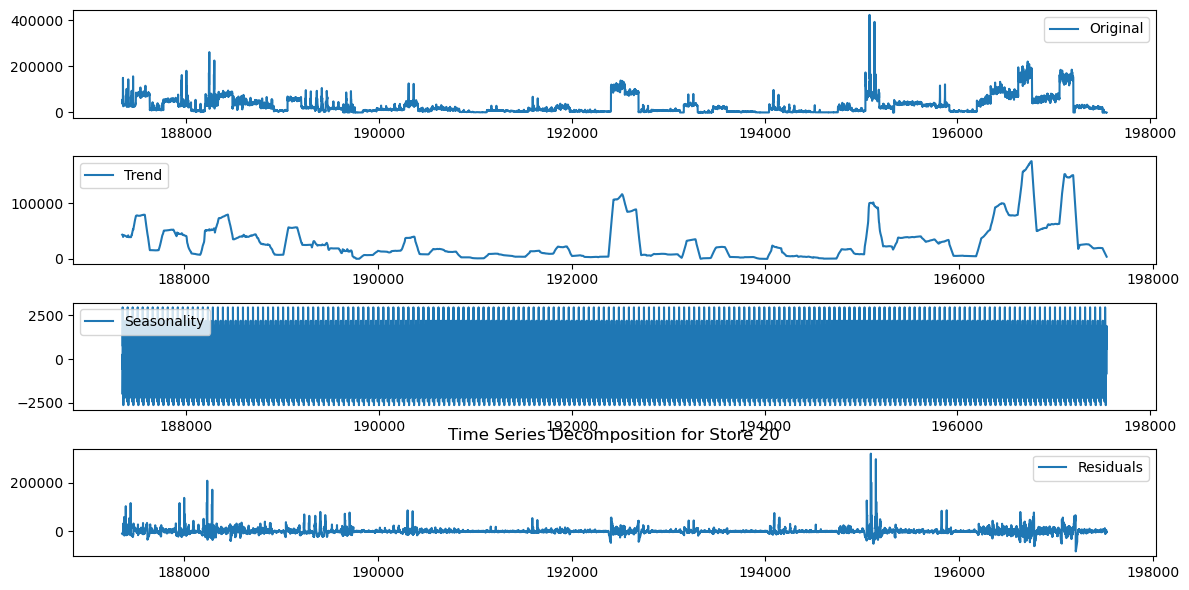

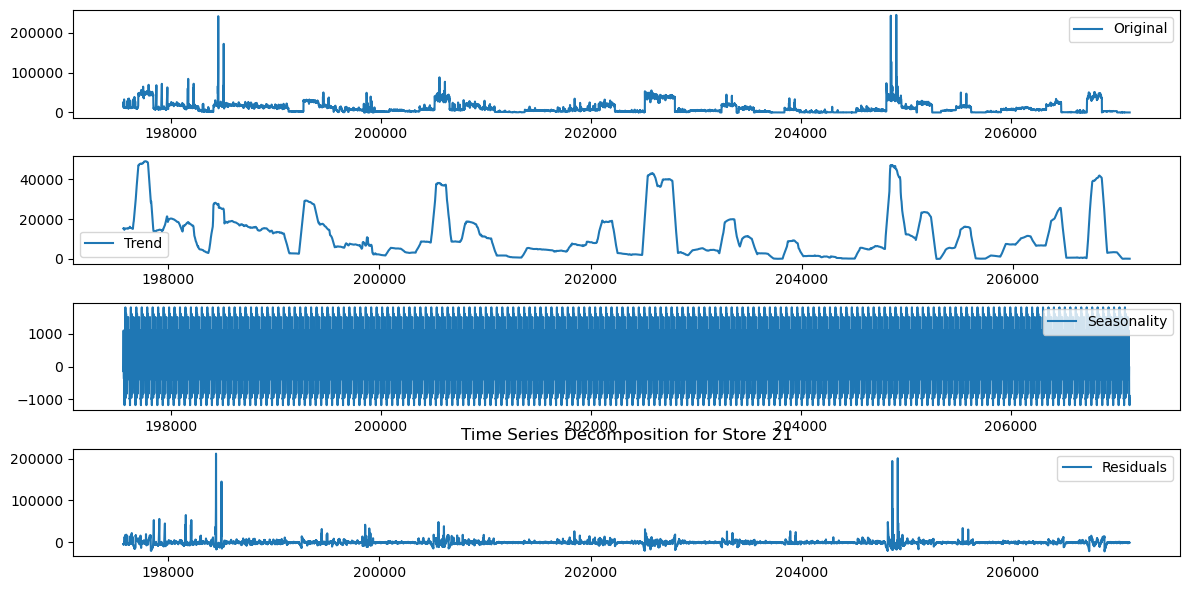

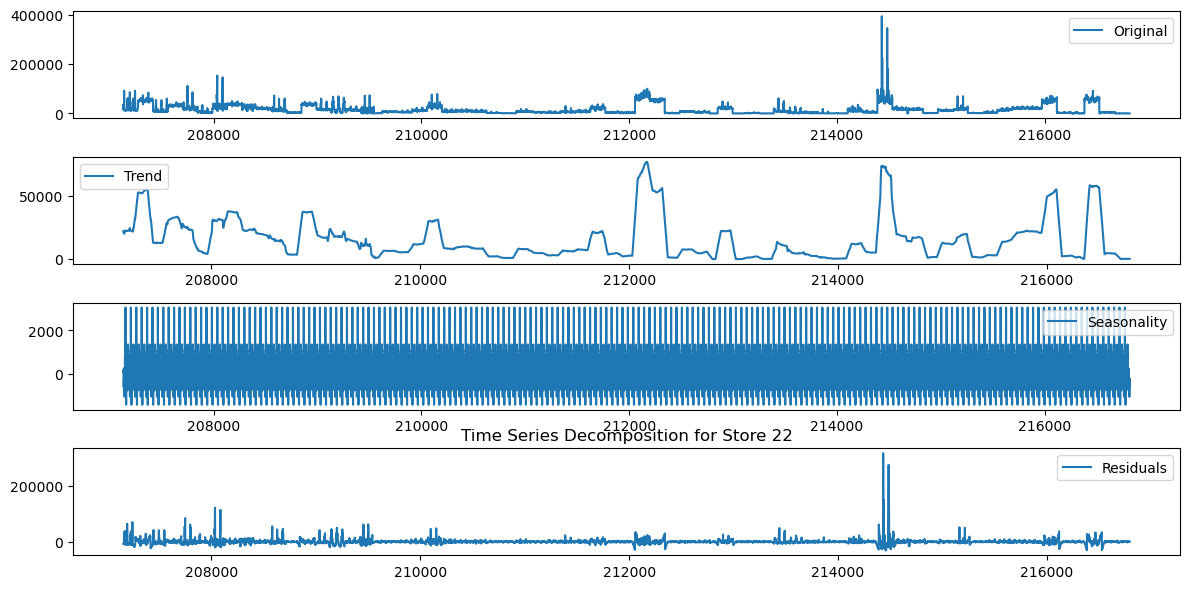

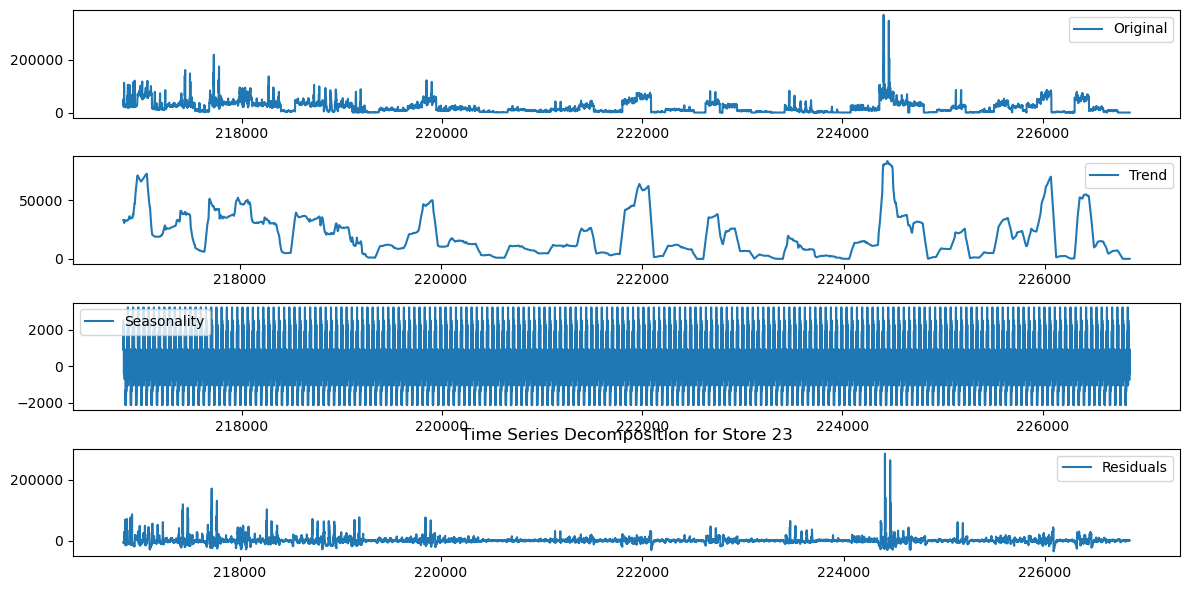

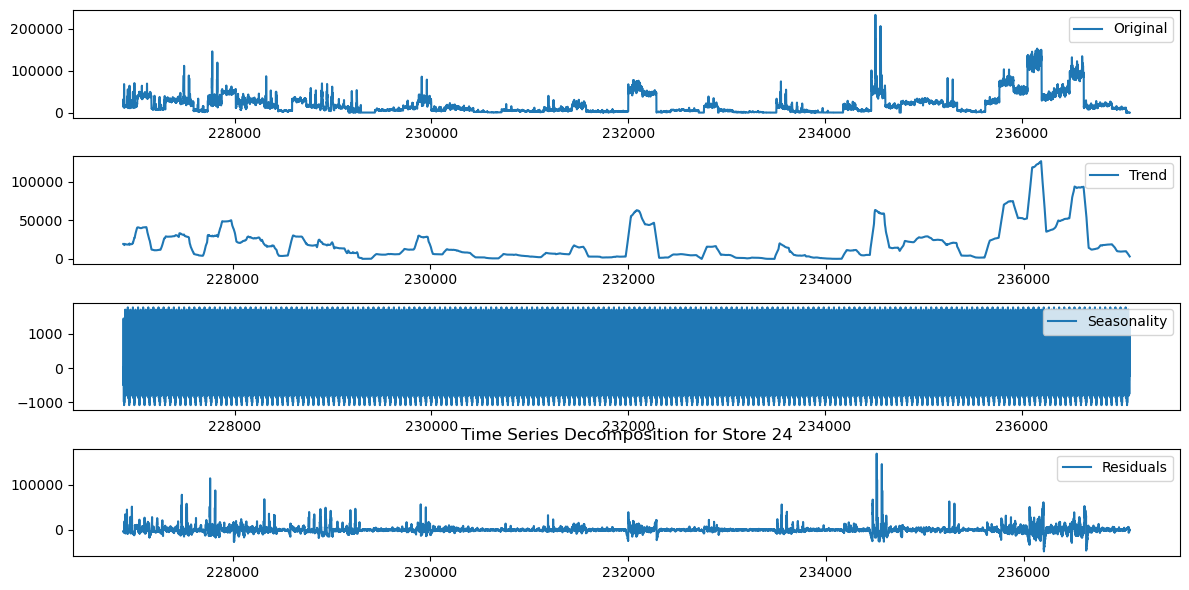

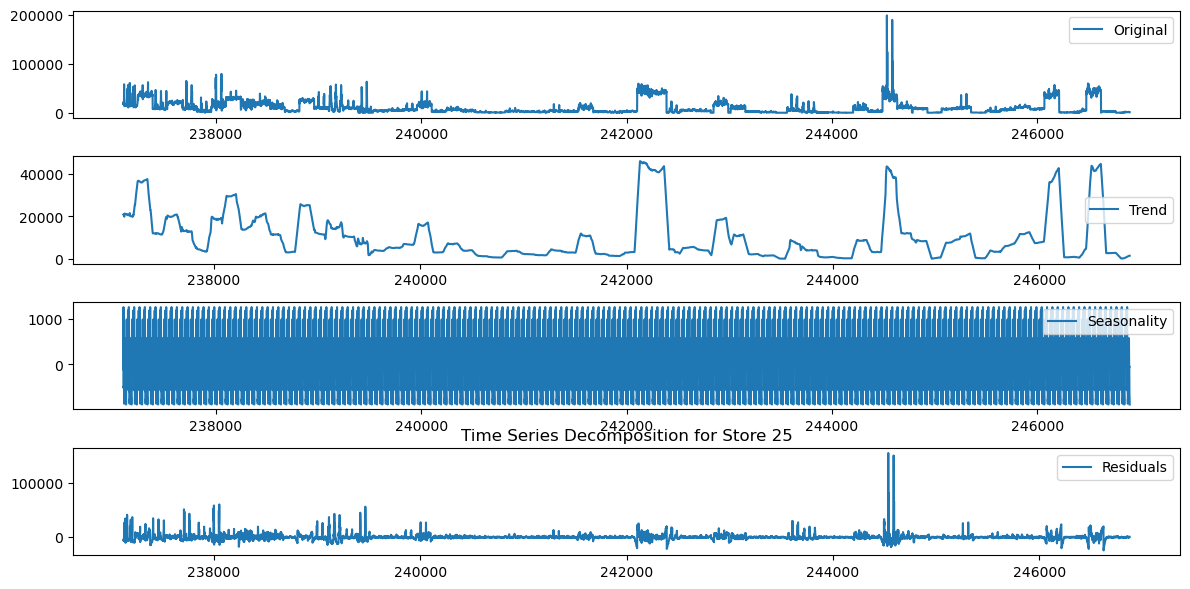

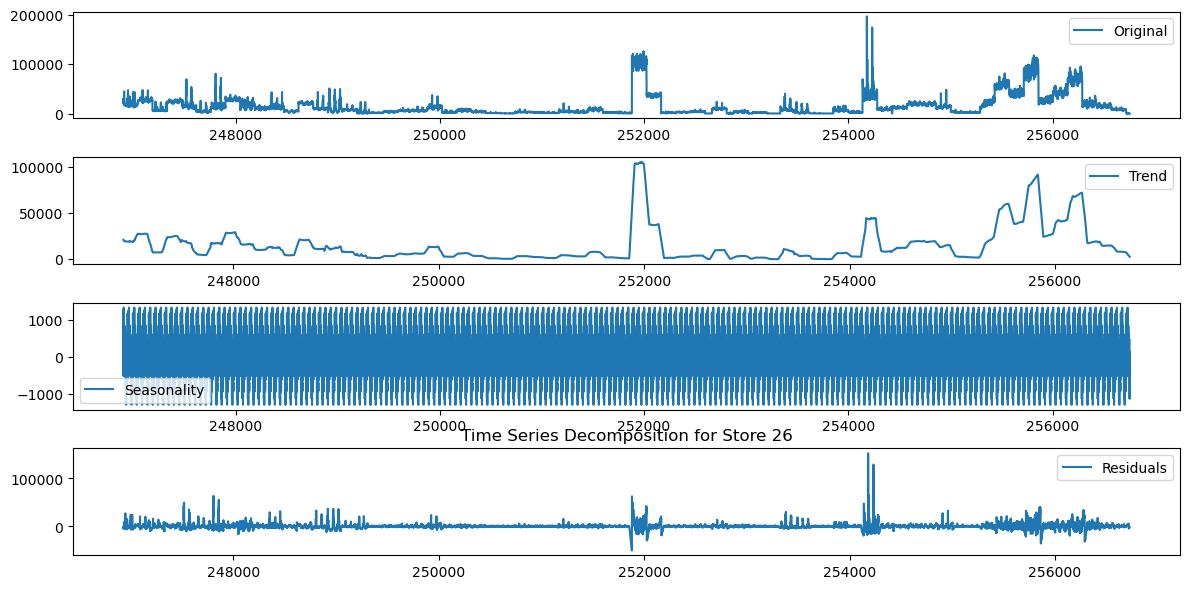

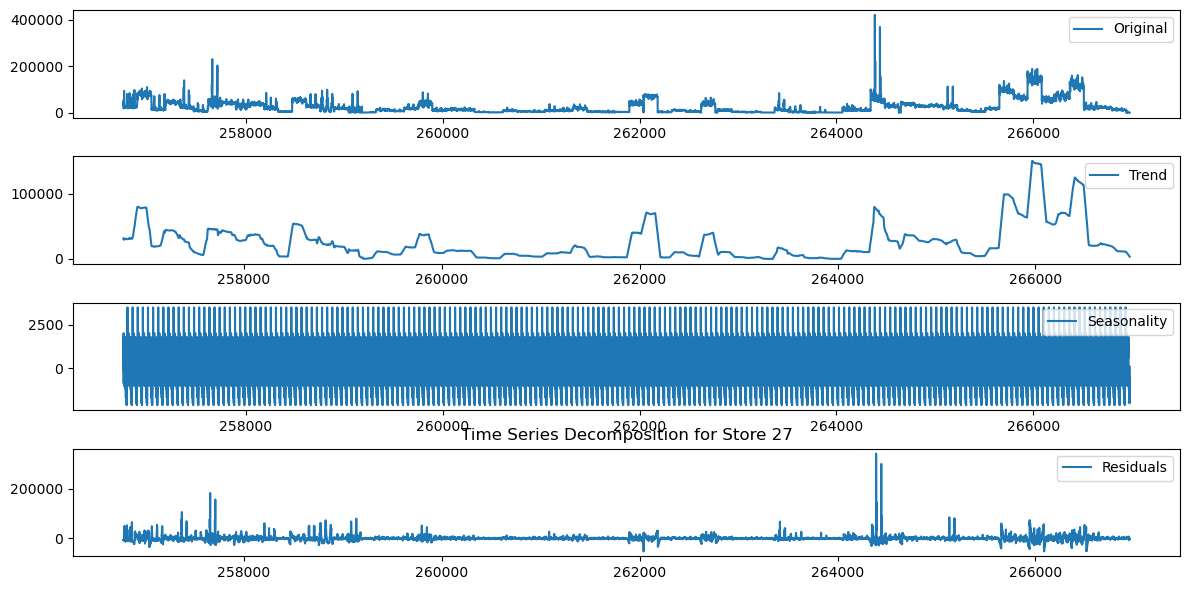

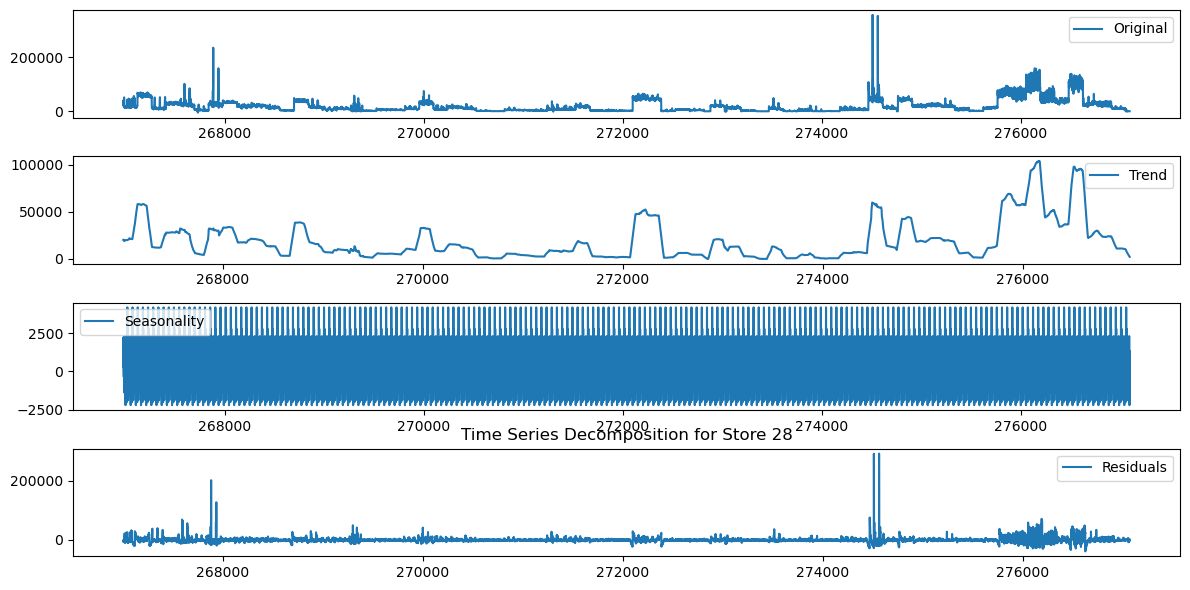

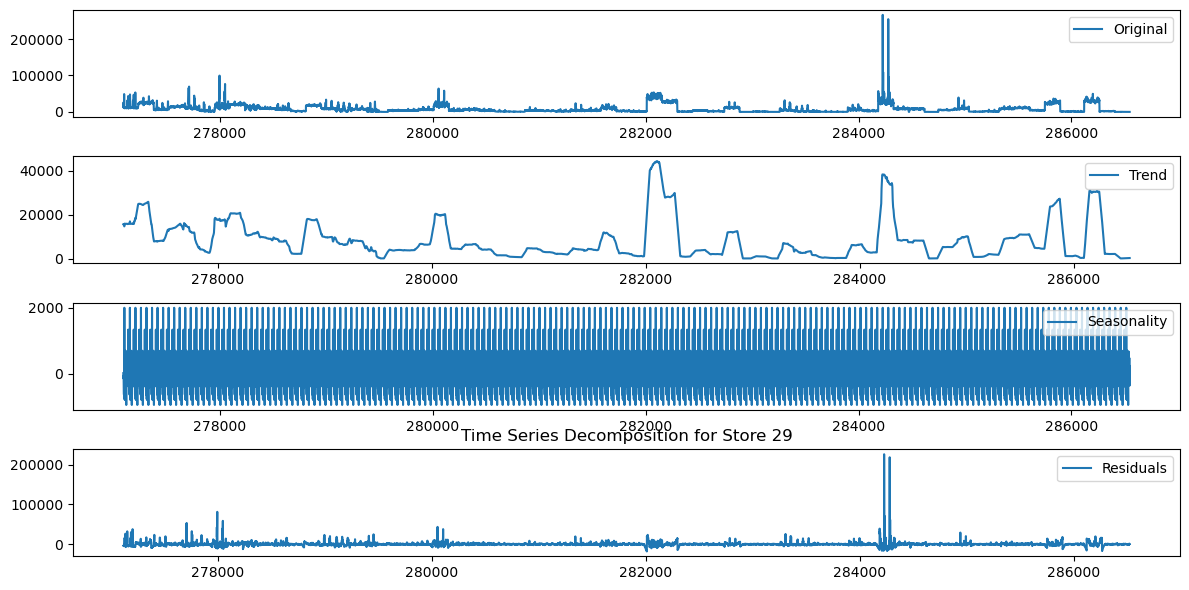

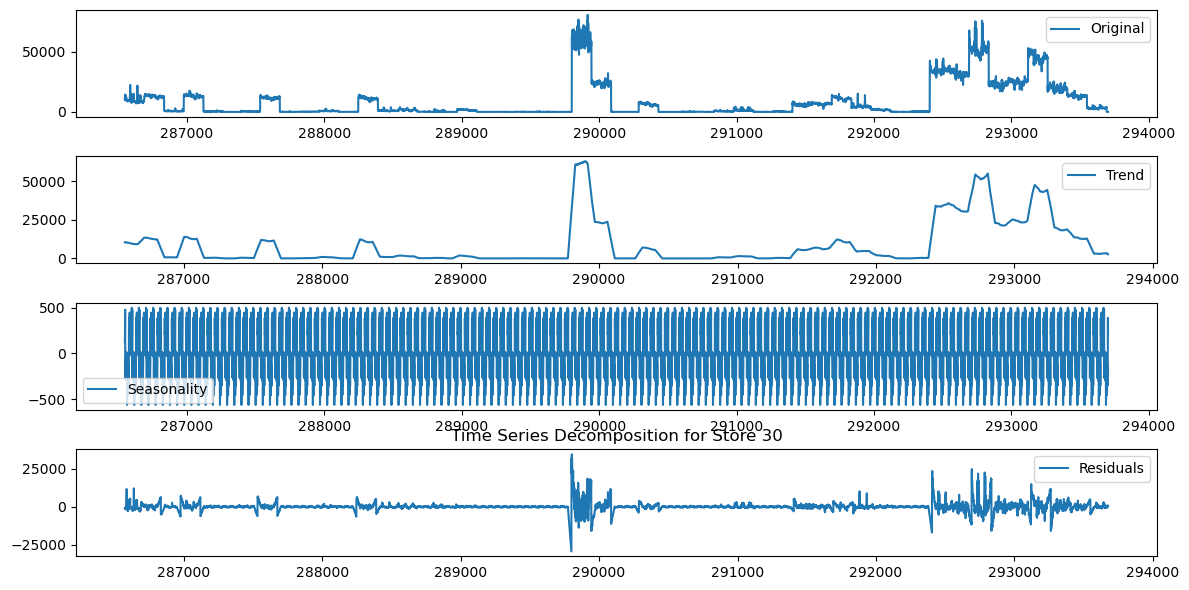

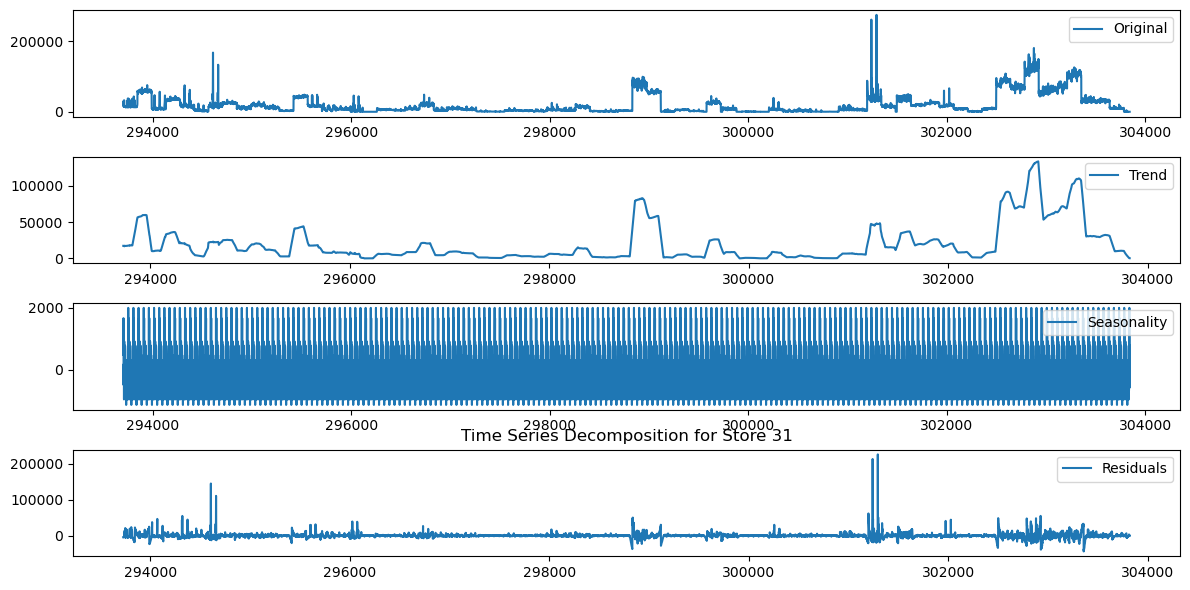

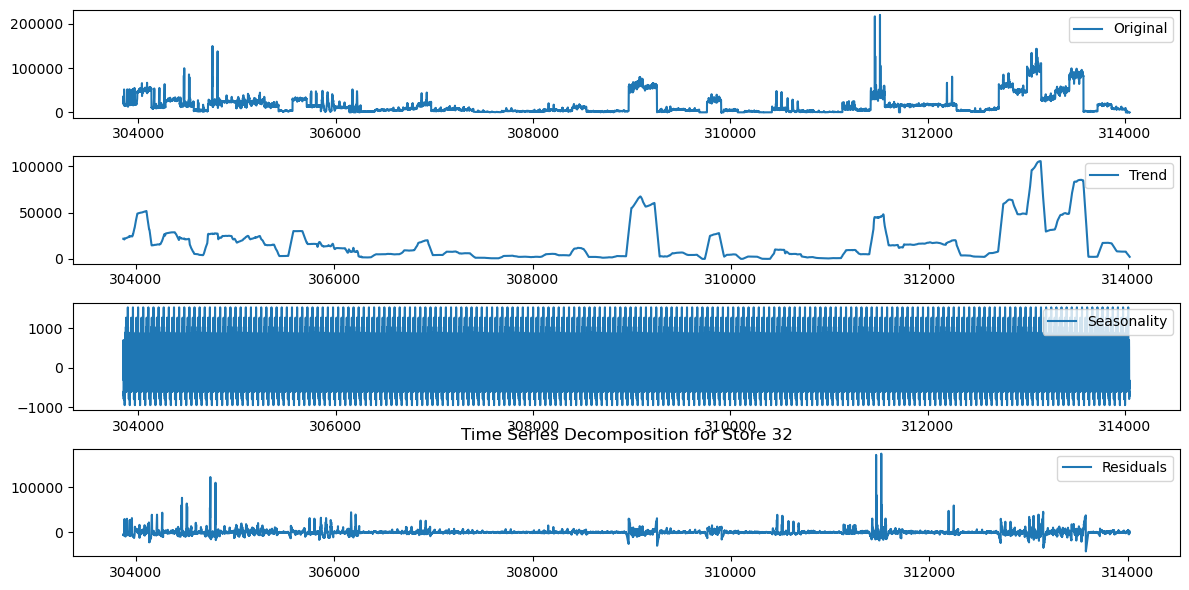

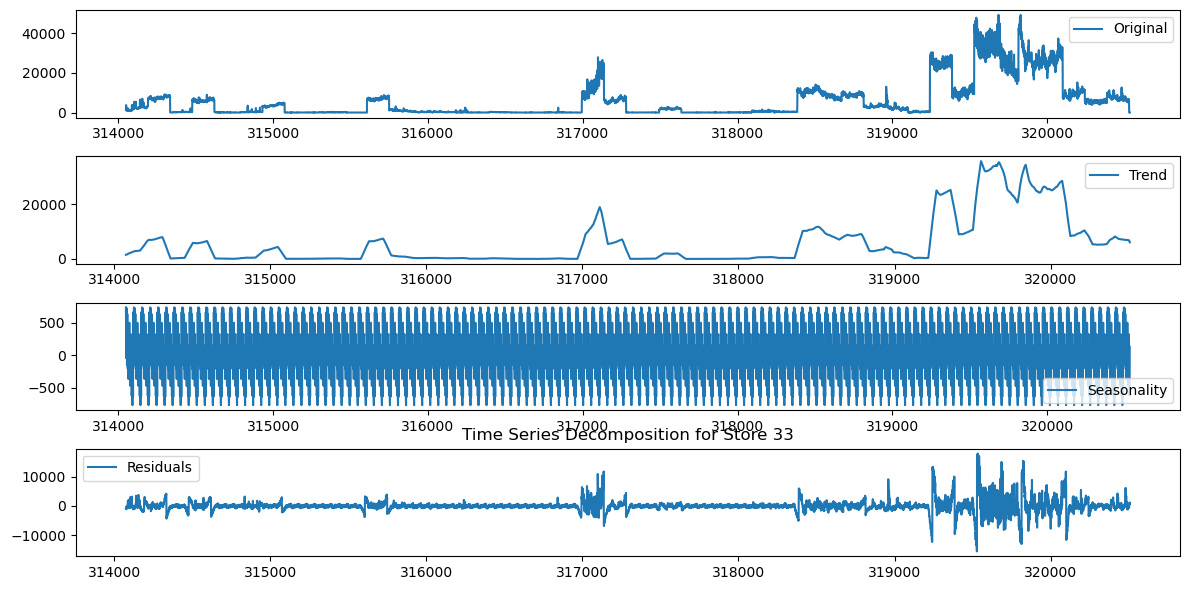

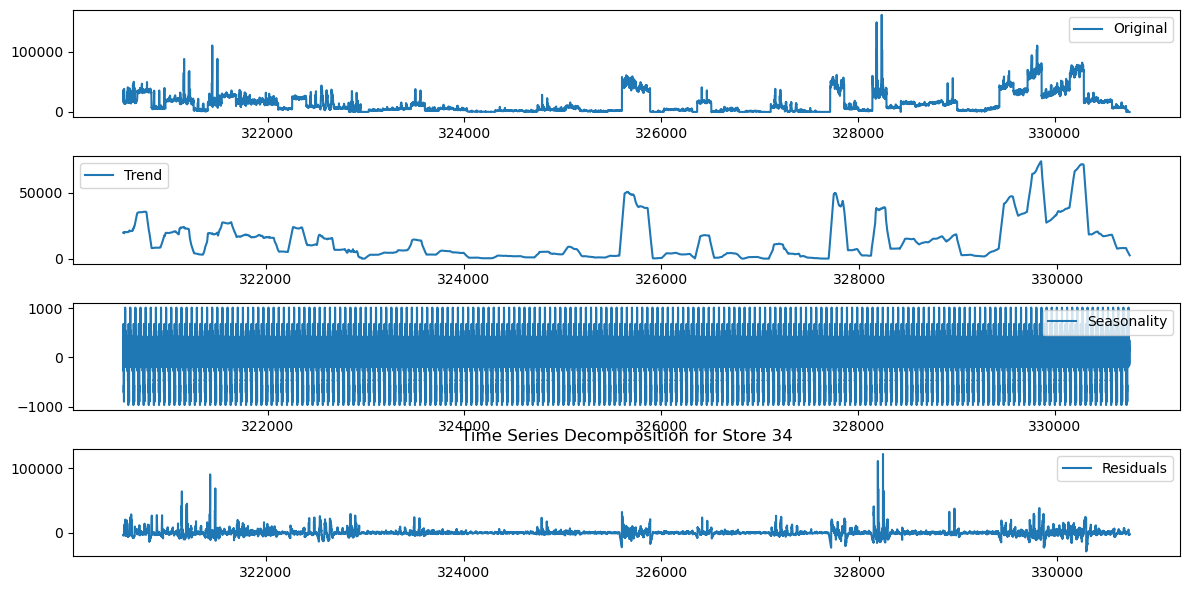

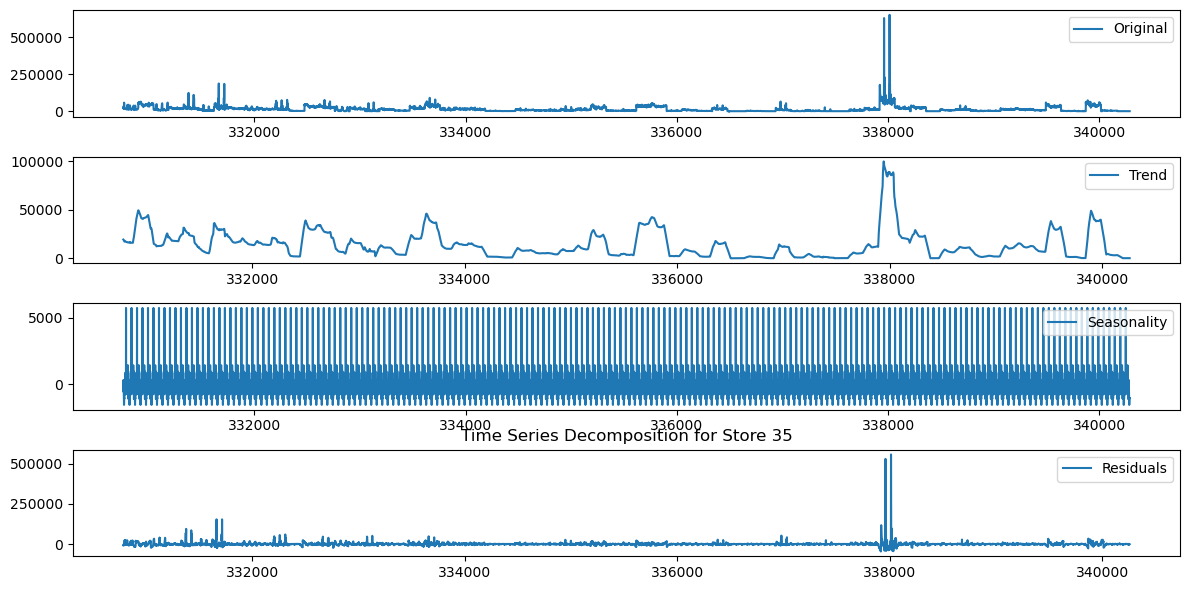

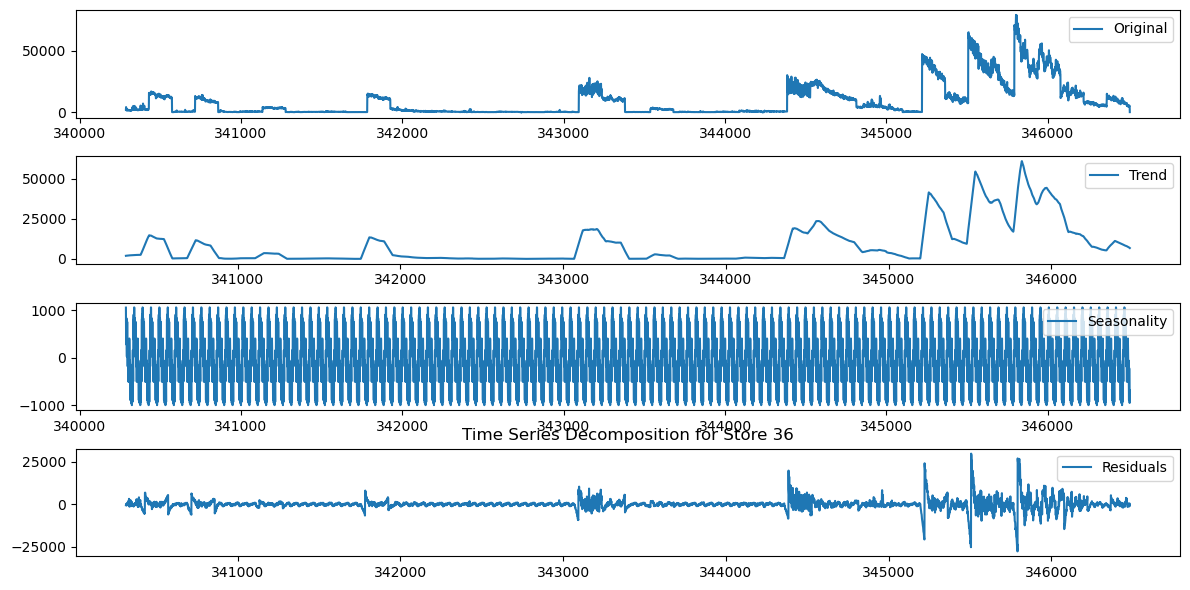

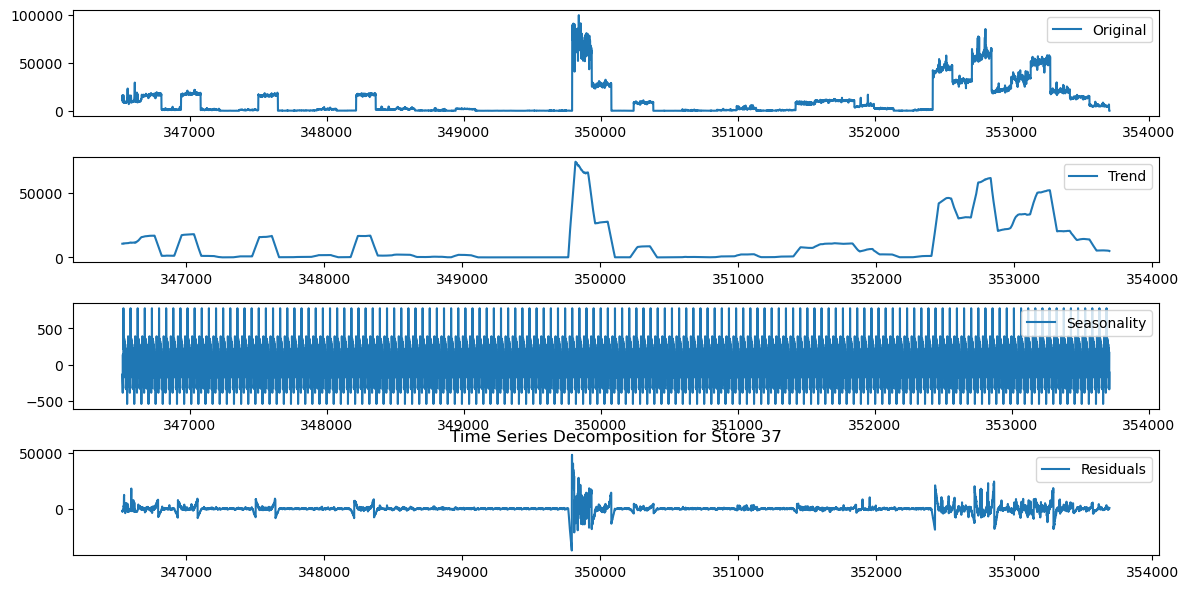

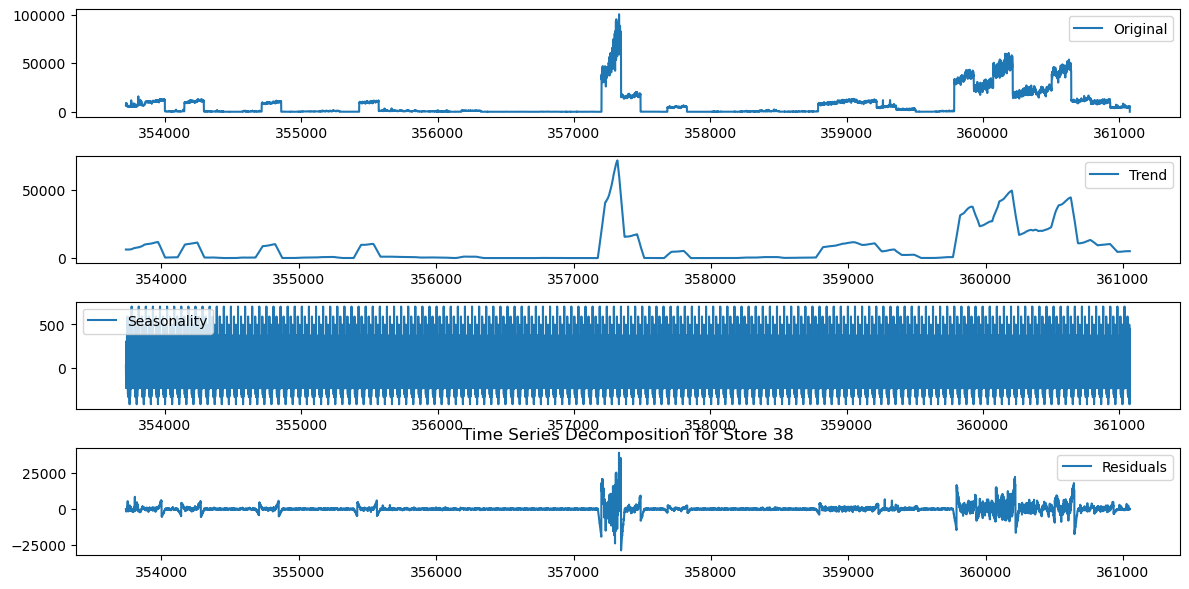

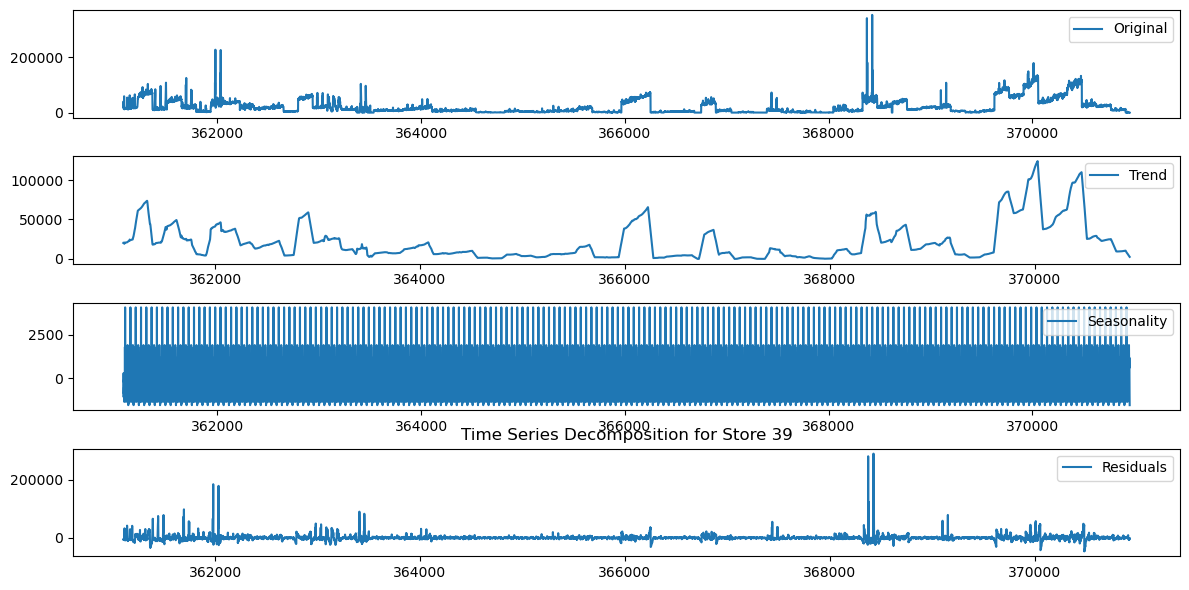

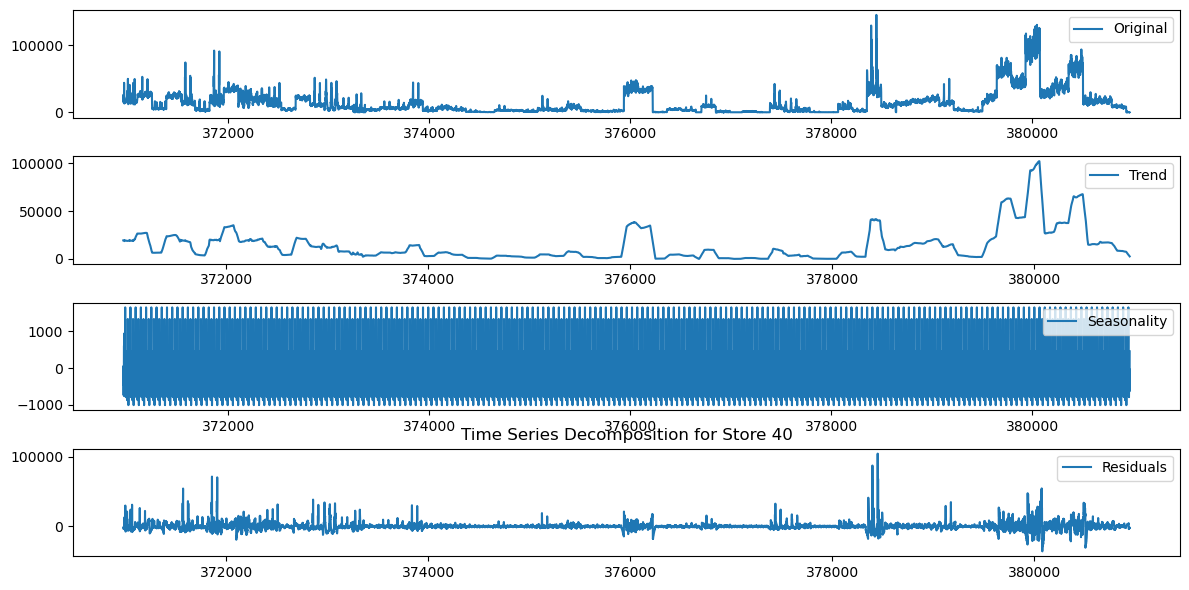

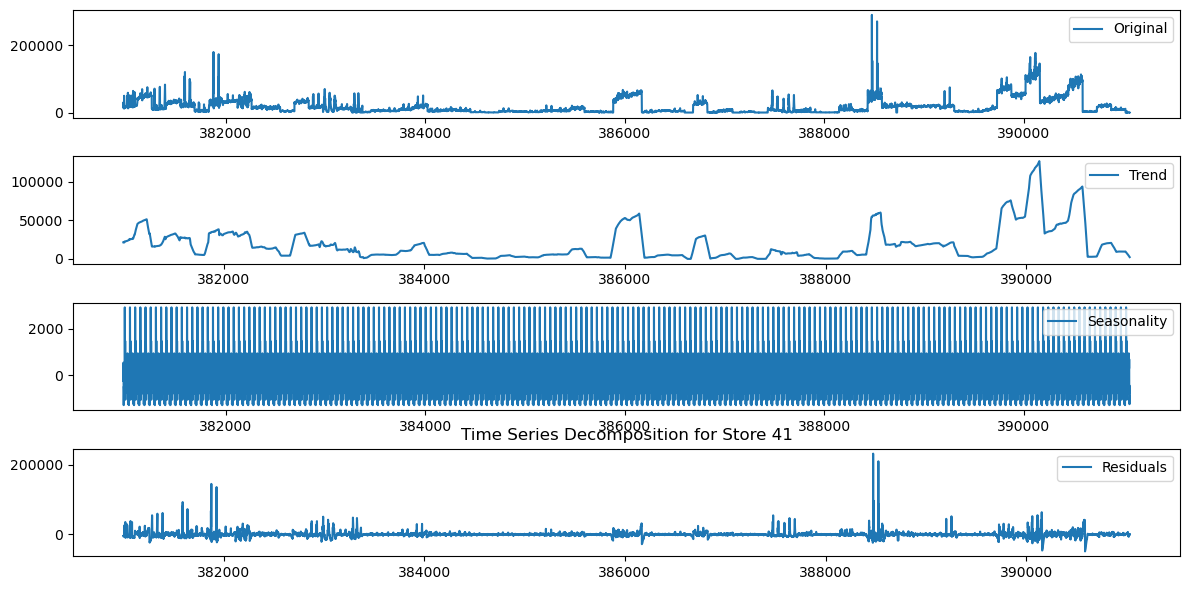

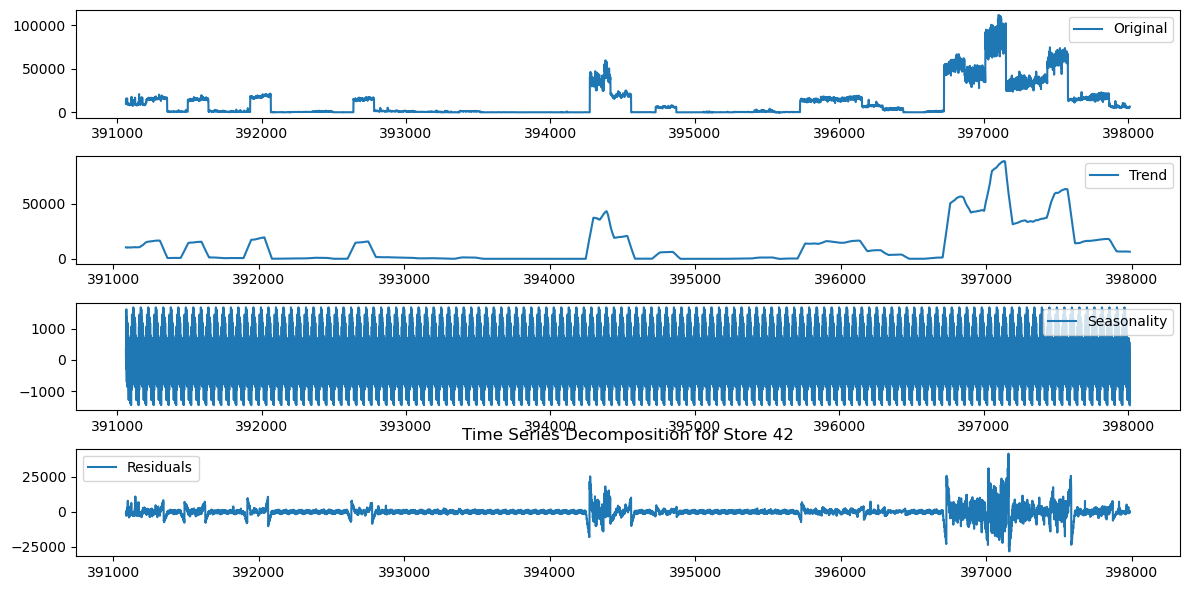

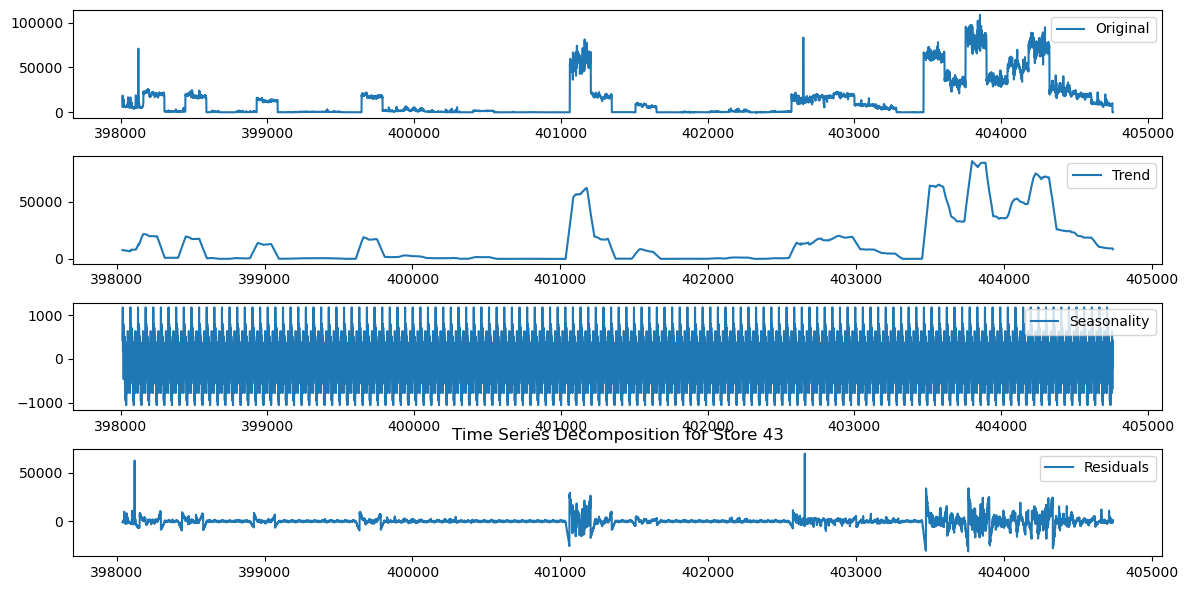

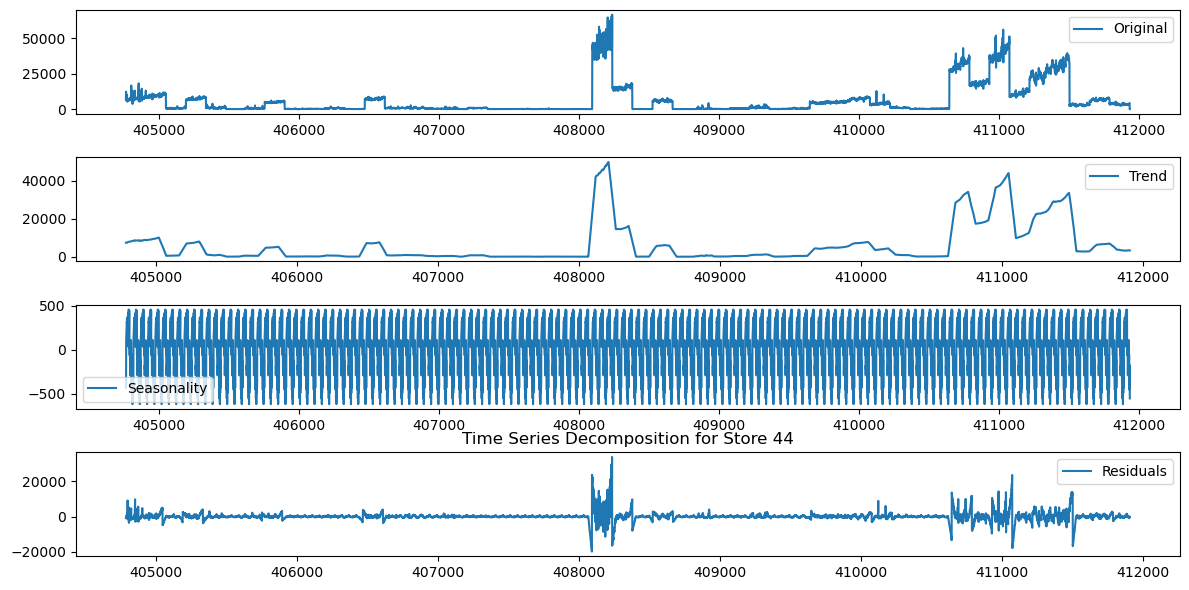

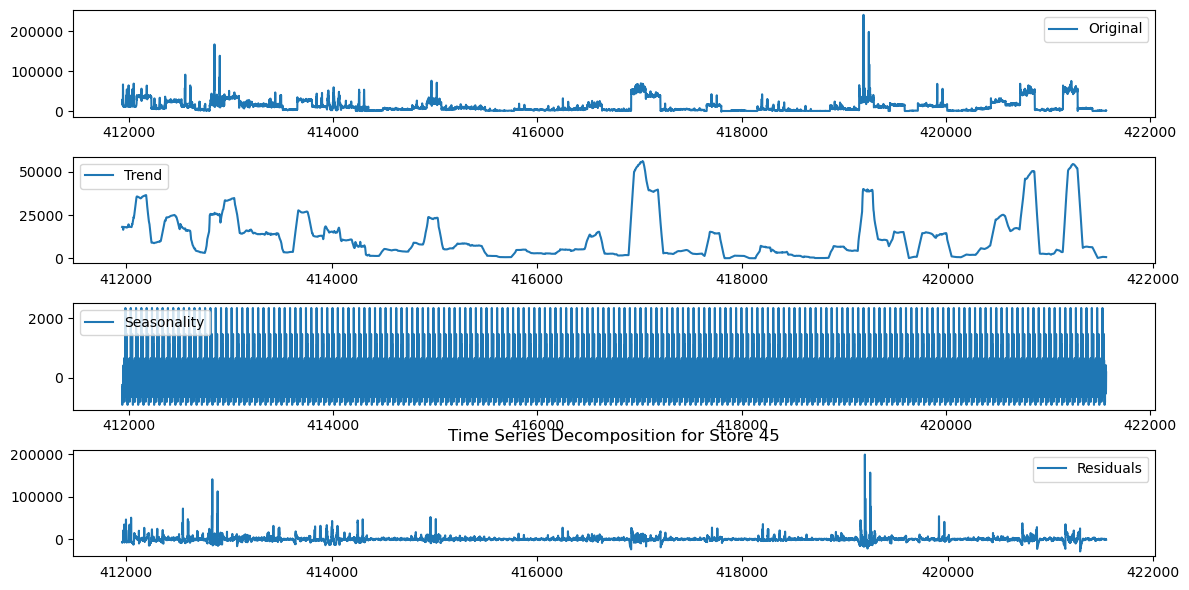

In [22]:
# Plot time series decomposition for all stores
from statsmodels.tsa.seasonal import seasonal_decompose
for store in df_train['Store'].unique():
    store_data = df_train[df_train['Store'] == store]
    decomposition = seasonal_decompose(store_data['Weekly_Sales'], model='additive', period=52)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12,6))
    plt.subplot(411)
    plt.plot(store_data['Weekly_Sales'], label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(f'Time Series Decomposition for Store {store}')
    plt.show()


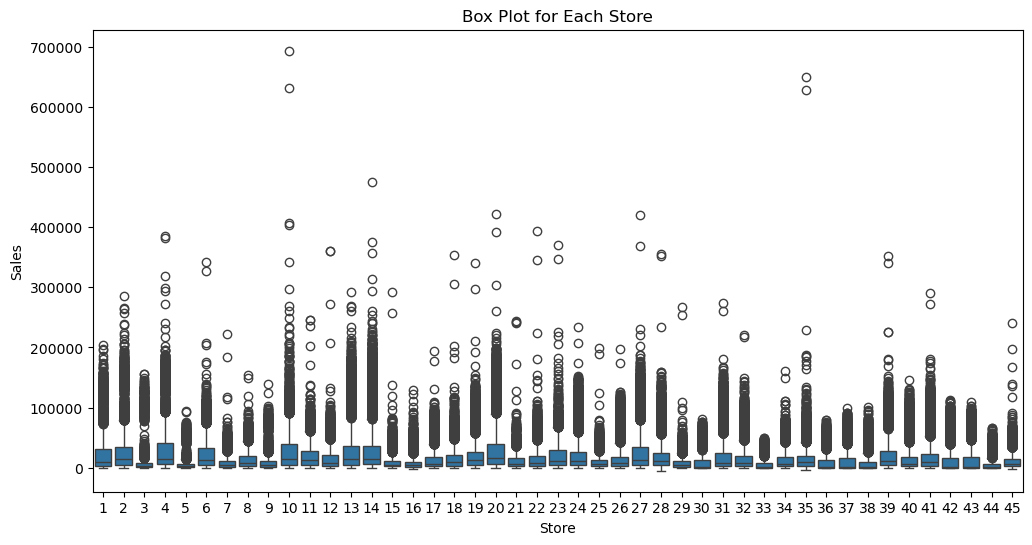

In [23]:
# Box plot for each store
plt.figure(figsize=(12,6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df_train)
plt.title('Box Plot for Each Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()